# Foundations of machine learning – 1 st assignment

**pouyamirzaei**

40022104

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (20,10)
from scipy.stats import ttest_ind


# **First dataset: Real estate price prediction**

In [ ]:
df = pd.read_csv('/content/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.shape

(414, 8)

# Data Cleaning and Exploratoin

In [ ]:
#Remove the id column
df.drop('No', inplace=True, axis=1)

# Rename the columns (remove X1..X2..X3.. and Y)
df.columns = ['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


There are 7 features:
1. transaction date
2. house age
3. distance to the nearest MRT station
4. number of convenience stores
5. latitude
6. longitude
7. house price of unit area

There are no NULL values

In [ ]:
df.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


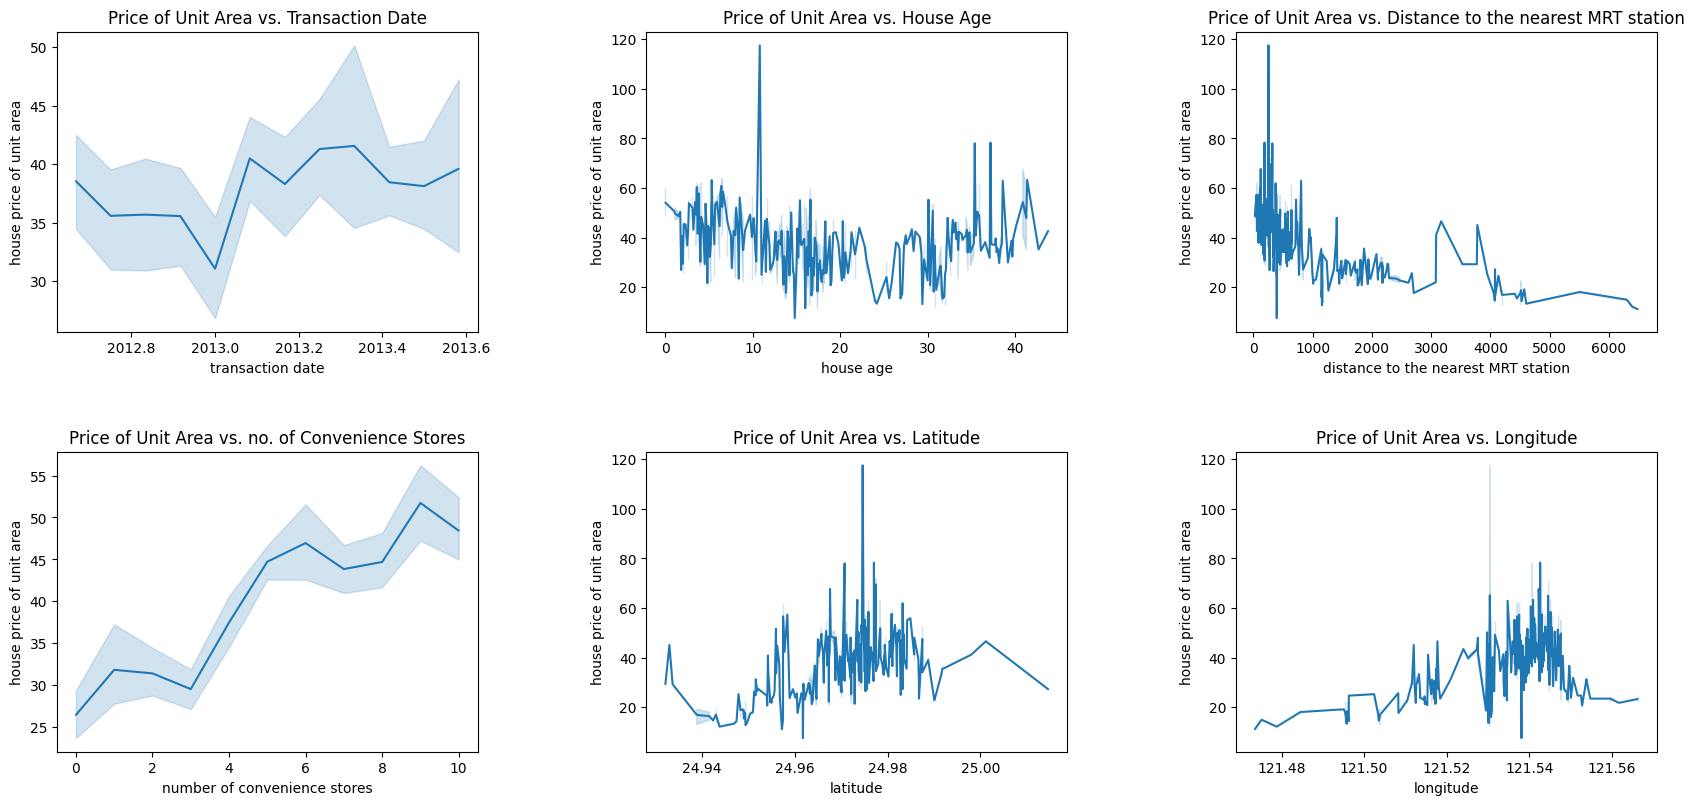

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=df, x="transaction date", y="house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=df, x="house age", y="house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=df, x="distance to the nearest MRT station", y="house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=df, x="number of convenience stores", y="house price of unit area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=df, x="latitude", y="house price of unit area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=df, x="longitude", y="house price of unit area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show();

We can clearly see that the house price of unit area is proportional to the number of convenience stores.

Additionally, we can see that the closer the house is to the nearest MRT station, the heigher the price of unit are is.

The more the number of convenience stores near the house, the the higher the price of the unit area

Unexpectedly, the house age is not proportional to the price of unit area, but we can see a pattern and an obvious outlier.

A pattern can be noticed in longitude and latitude, but we need to explore them more.

let's take a look at the outliers


Distribution:

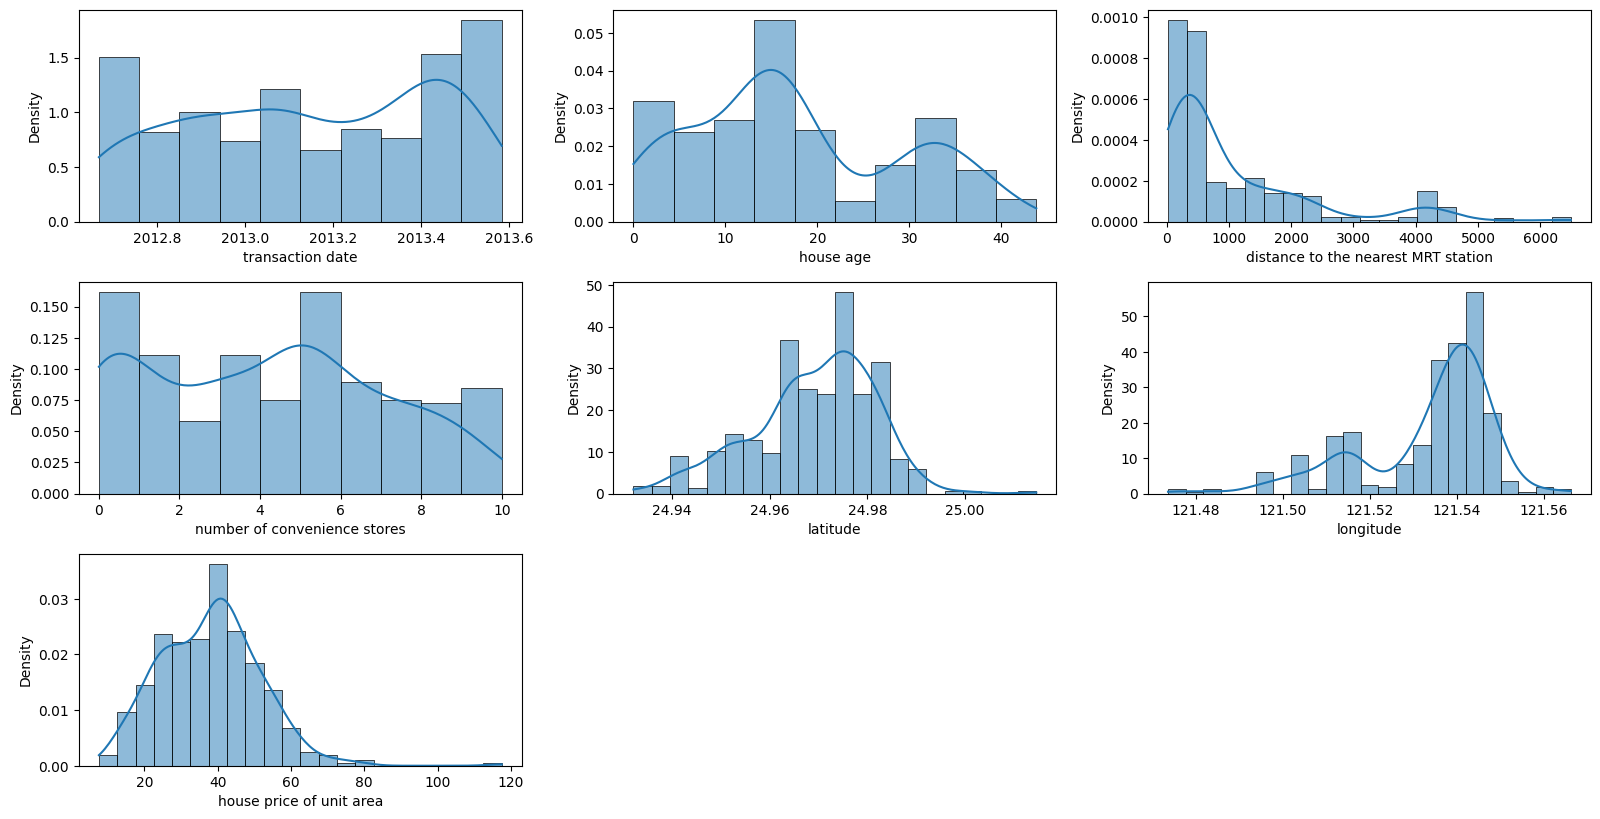

In [ ]:
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(df):
    plt.subplot(6,3,index+1)
    sns.histplot(df.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

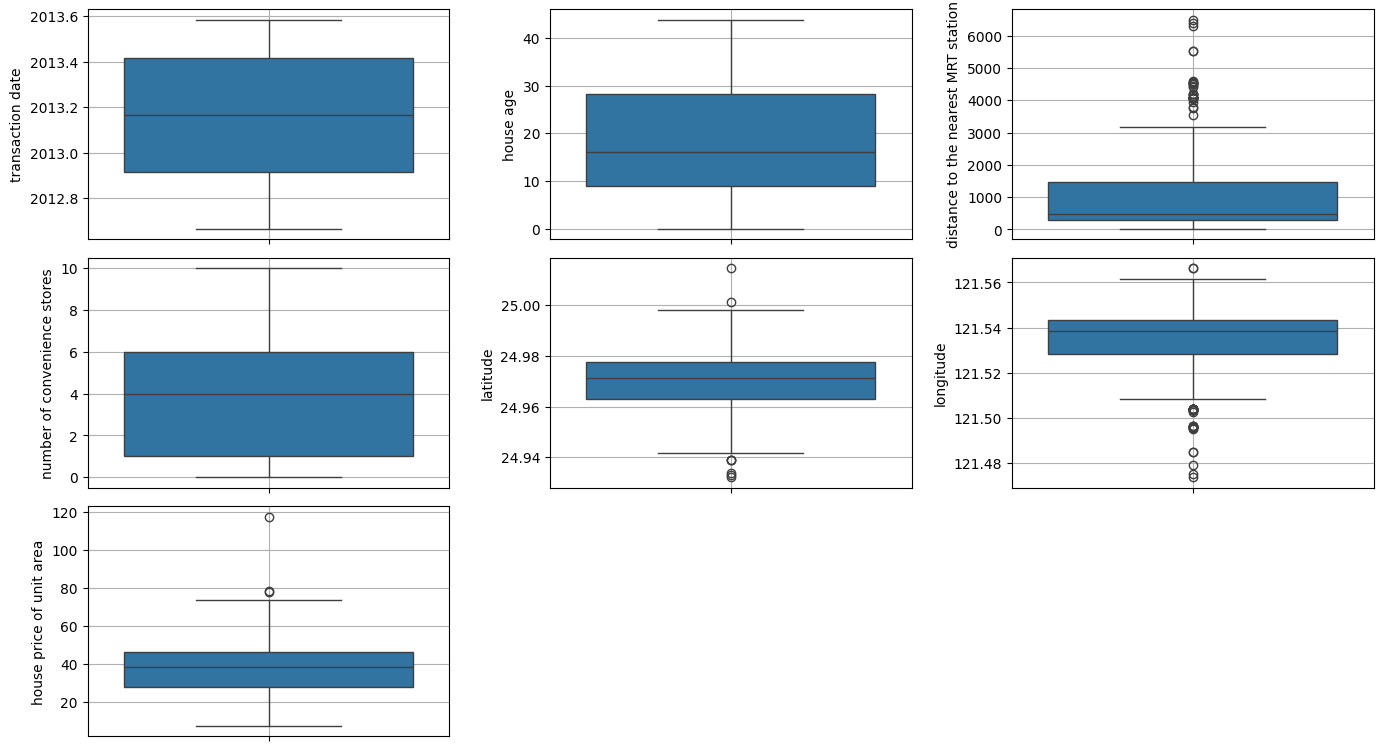

In [ ]:
#Check outliers
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=df.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

We can see that there are obvious outliers in:
 house price of unit area

 longitude

 distance to the nearest MRT station

**Drop the outliers**

In [ ]:
df = df[df['house price of unit area']<80]
df = df[df['distance to the nearest MRT station']<3000]
df = df[df['longitude']>121.50]

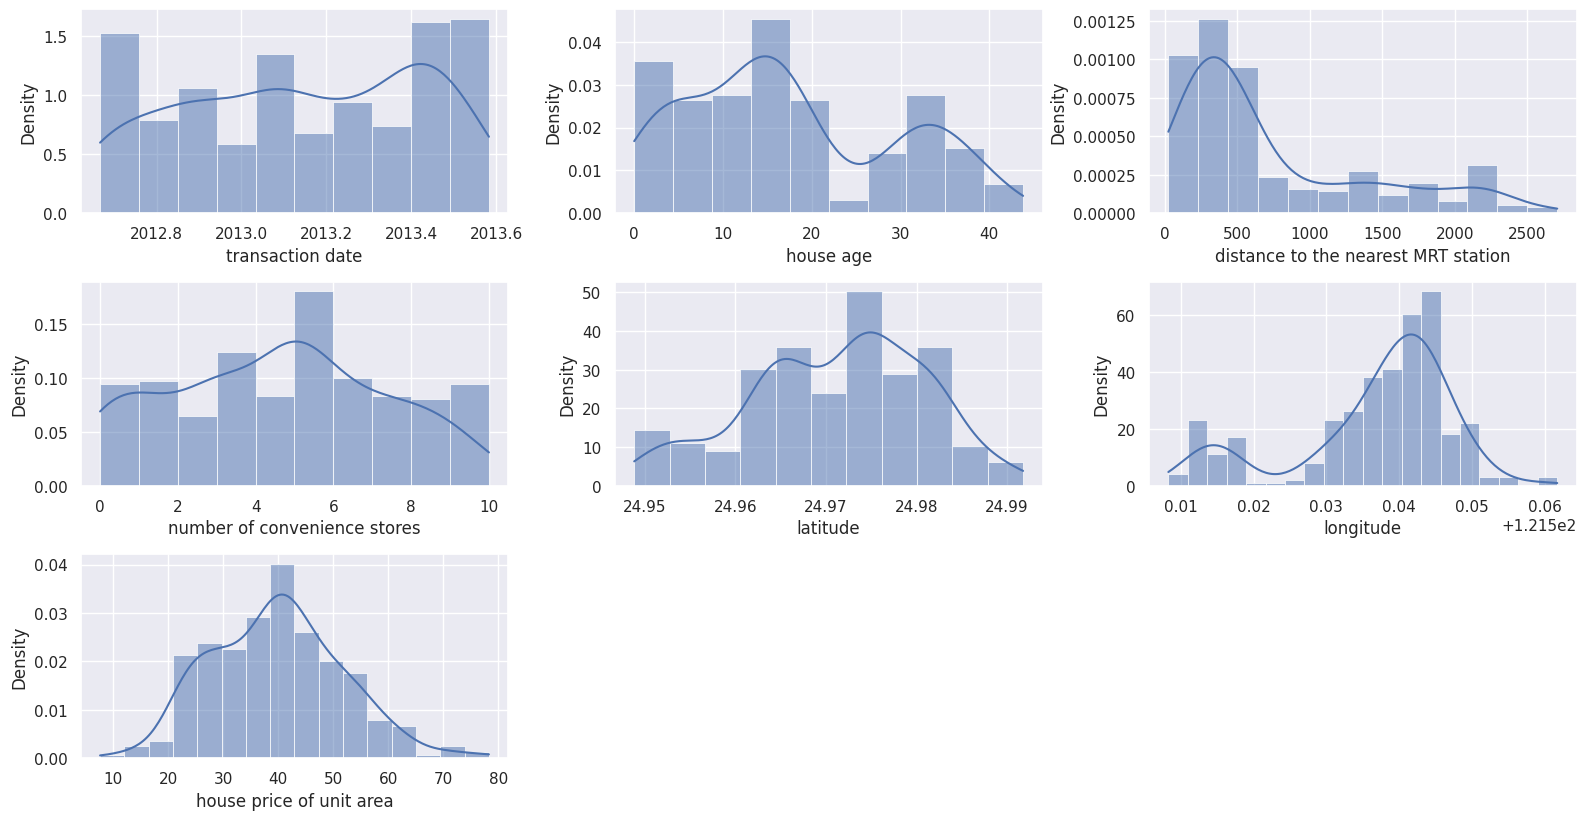

In [ ]:
# Check outliers
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(df):
    plt.subplot(6,3,index+1)
    sns.histplot(df.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

better than before

**Check the correlation**

In [ ]:
# Corr to price of unit area
numeric_train = df
correlation = numeric_train.corr()
correlation[['house price of unit area']].sort_values(['house price of unit area'], ascending=False)

,house price of unit area
house price of unit area,1.000000
number of convenience stores,0.534043
latitude,0.450299
longitude,0.391304
transaction date,0.088958
house age,-0.217941
distance to the nearest MRT station,-0.676780


The number of convenience stores is moderately correlated to the price of unit area, while the distance to the nearest MRT station negatively correlated

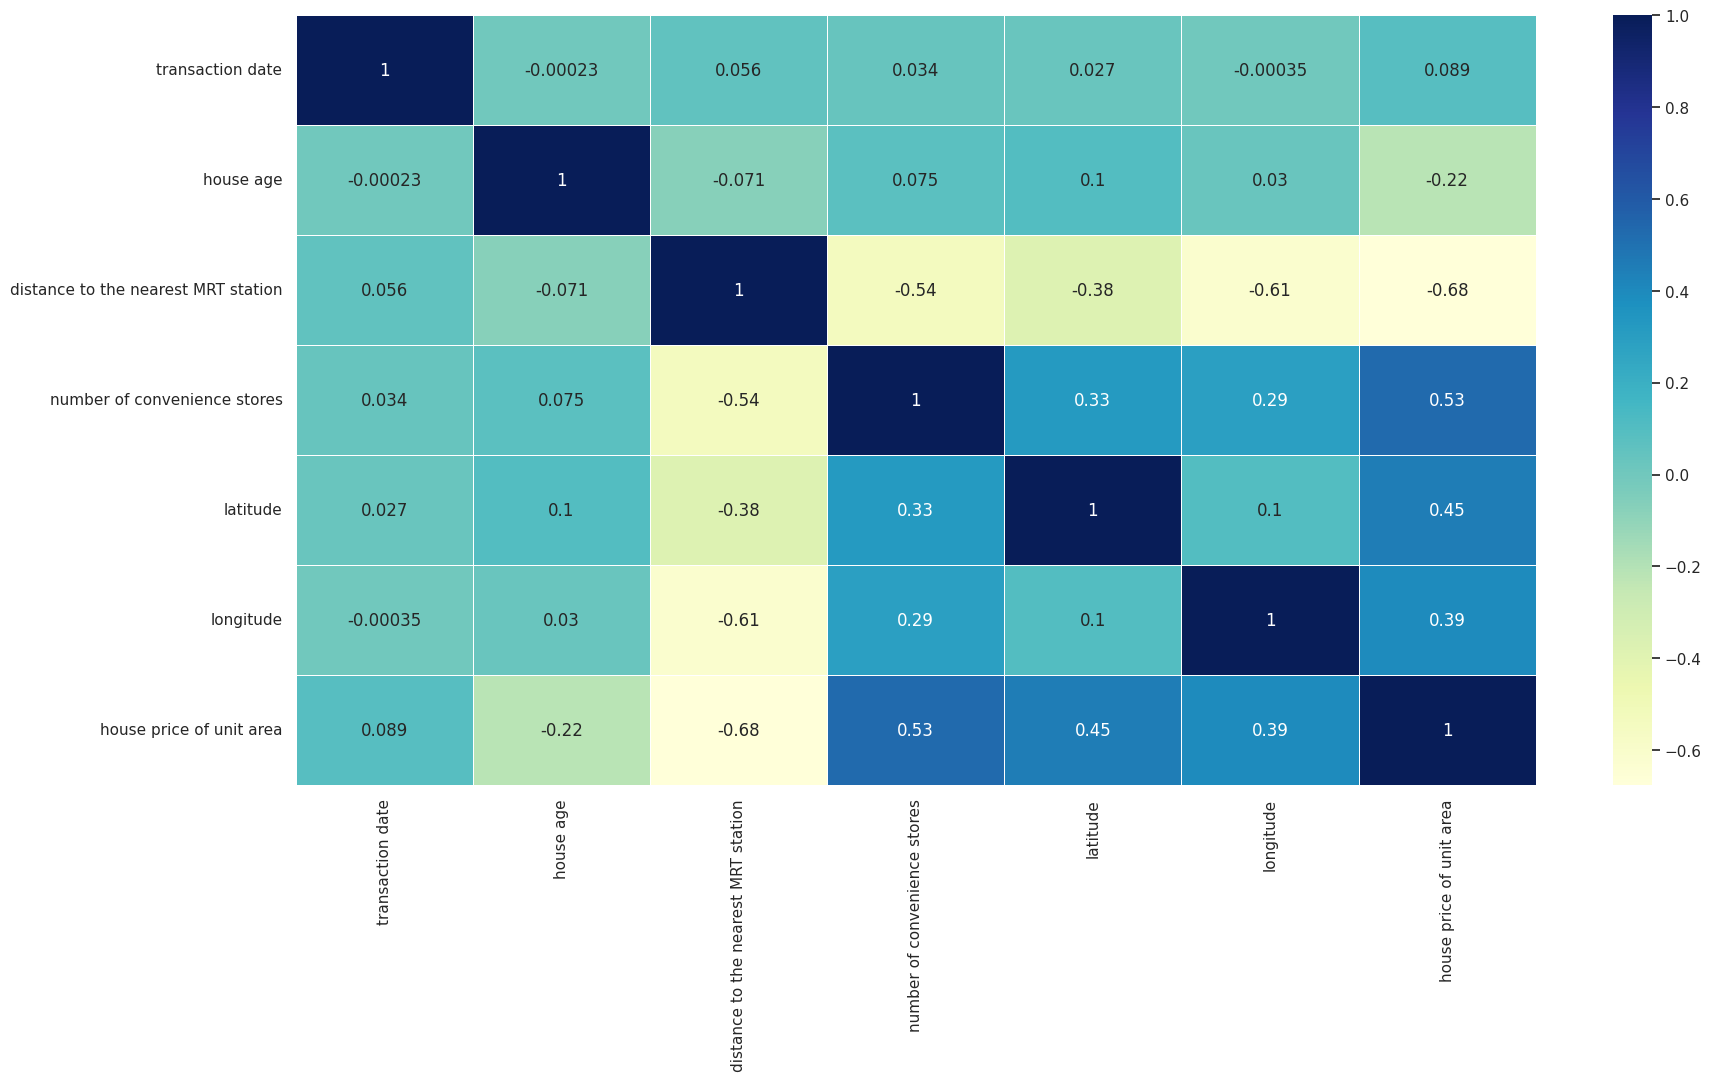

In [ ]:
# correlation plot (heatmap)
corr = df.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True, linewidths=.5);

In [ ]:
import scipy.stats as stats

#1
median_age = df['house age'].median()
above_median_age = df[df['house age'] > median_age]['house price of unit area']
below_median_age = df[df['house age'] <= median_age]['house price of unit area']
t_statistic, p_value = stats.ttest_ind(above_median_age, below_median_age)
alpha = 0.05
print(p_value)
if p_value < alpha:
    print("The average price per unit area of houses above the median age is significantly different from those below the median age.")
else:
    print("There is no significant difference in the average price per unit area of houses above the median age and those below the median age.")


8.723194612841766e-06
The average price per unit area of houses above the median age is significantly different from those below the median age.


In [ ]:
#2
grouped_data = df.groupby('number of convenience stores')['house price of unit area']
f_statistic, p_value = stats.f_oneway(*[group for _, group in grouped_data])
alpha = 0.05
print(p_value)
if p_value < alpha:
    print("The average price per unit area significantly differs by the number of convenience stores (p-value = {:.4f}).".format(p_value))
else:
    print("There is no significant difference in the average price per unit area by the number of convenience stores (p-value = {:.4f}).".format(p_value))

3.099080759717644e-31
The average price per unit area significantly differs by the number of convenience stores (p-value = 0.0000).


In [ ]:
#3
from scipy.stats import chi2_contingency

df['transaction date'] = pd.Categorical(df['transaction date'])
df['number_of_conv_stores'] = pd.Categorical(df['number of convenience stores'])
contingency_table = pd.crosstab(df['transaction date'], df['number of convenience stores'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
if p_value < alpha:
    print("There is a significant association between 'transaction date' and 'number of convenience stores'.")
else:
    print("There is no significant association between 'transaction date' and 'number of convenience stores'.")

Chi-square statistic: 88.91668001467822
P-value: 0.9303310847847938
There is no significant association between 'transaction date' and 'number of convenience stores'.


In [ ]:
correlation = df.corr()['house price of unit area']
print("Correlation with the target variable house price of unit area:")
print(correlation)

Correlation with the target variable house price of unit area:
transaction date                       0.088958
house age                             -0.217941
distance to the nearest MRT station   -0.676780
number of convenience stores           0.534043
latitude                               0.450299
longitude                              0.391304
house price of unit area               1.000000
number_of_conv_stores                  0.534043
Name: house price of unit area, dtype: float64


# **Regression**

SPLIT THE DATASET TO TRAIN AND TEST

In [ ]:
X= df.drop('house price of unit area', axis=1)
y= df['house price of unit area']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

training phase

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X.columns, columns=['coeficient'])

,coeficient
transaction date,4.363552
house age,-0.250925
distance to the nearest MRT station,-0.008791
number of convenience stores,0.458982
latitude,302.488194
longitude,22.196578
number_of_conv_stores,0.458982


predicting on test data

In [ ]:
y_pred= model.predict(X_test)
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred}).head()

,Y_test,Y_pred
106,47.1,49.770959
43,34.1,42.471598
100,38.2,44.353387
380,53.3,49.517662
192,42.7,40.756817


In [ ]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)
MAE
MSE
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Squared Error (MSE): {:.4f}".format(MSE))
print("R-squared: {:.4f}".format(r2))

Mean Squared Error (MSE): 51.5043
R-squared: 0.5915


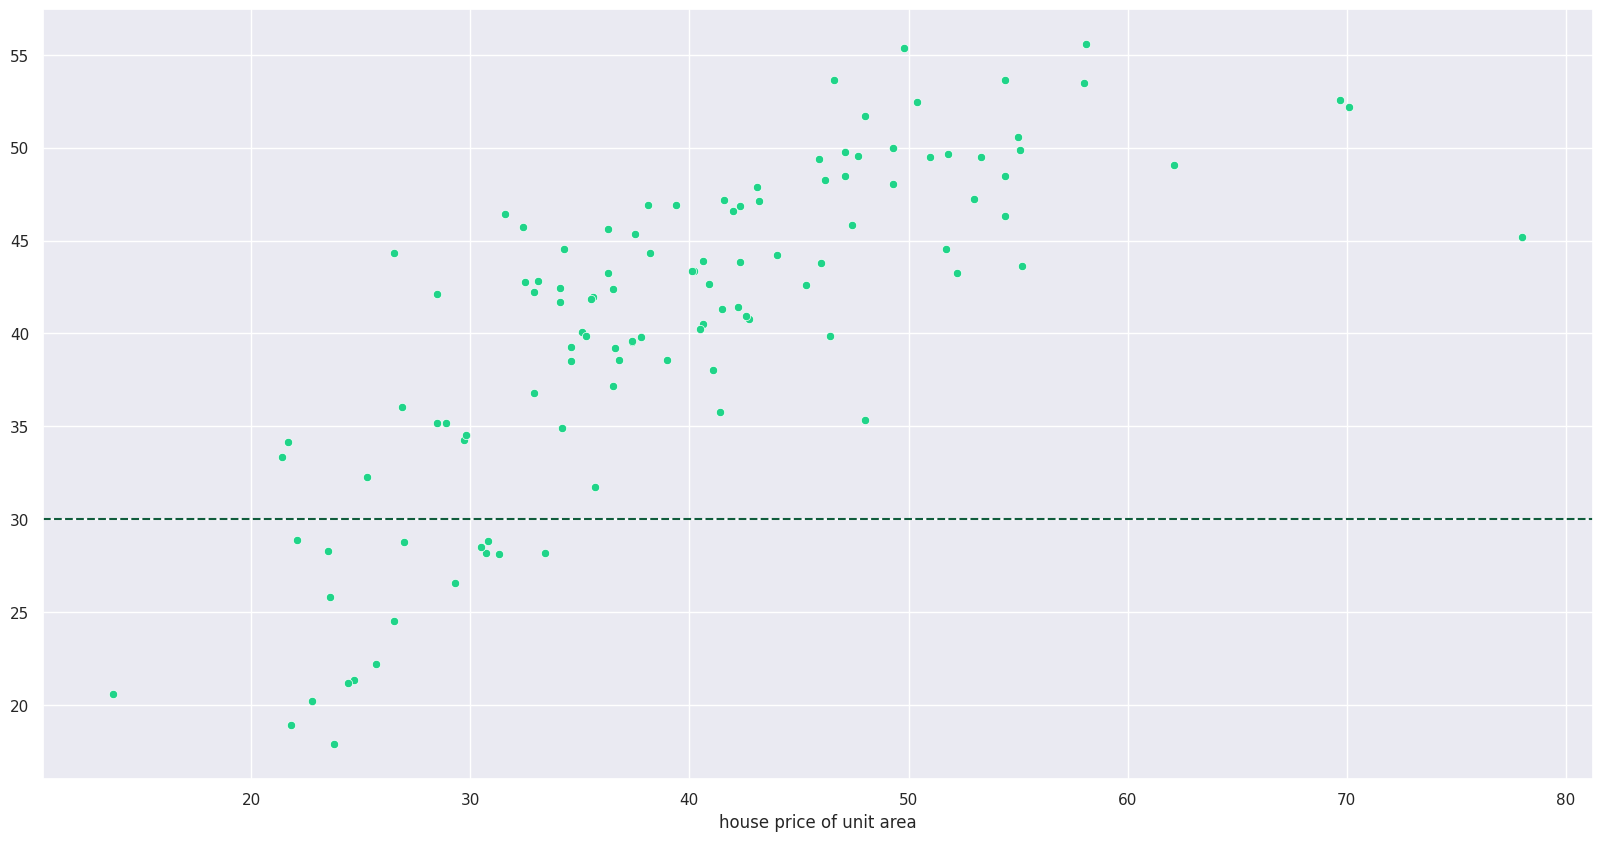

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='#20d489')
plt.axhline(y=30, color='#105c3c', ls='--')

# **Second dataset : Life Expectancy (WHO)**

In [ ]:
data = pd.read_csv("/content/Life Expectancy Data.csv")
pd.set_option("display.max_columns",None)
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
data.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
data.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

There is no duplicated values

Only 2 categorical Columns and 20 Numerical Columns

**Missing Values Distribution**

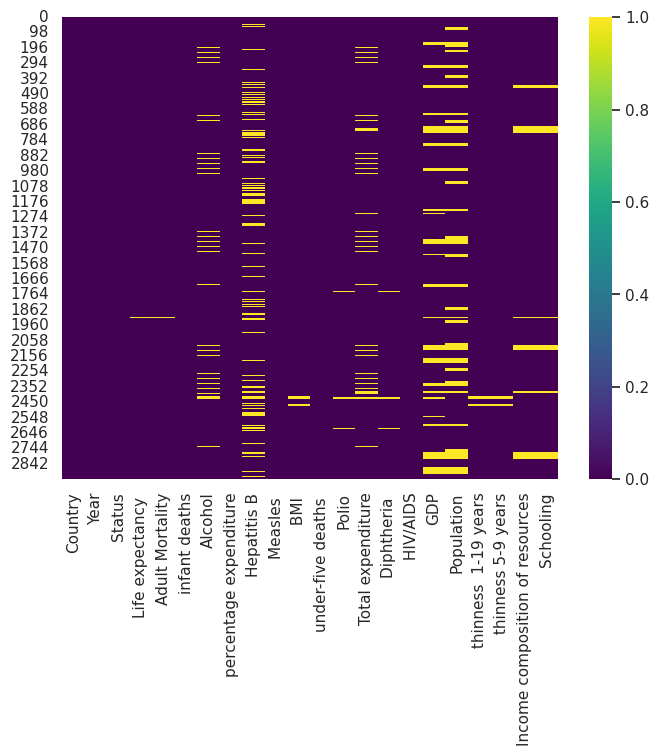

In [ ]:
plt.figure(figsize=(8, 6));
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()

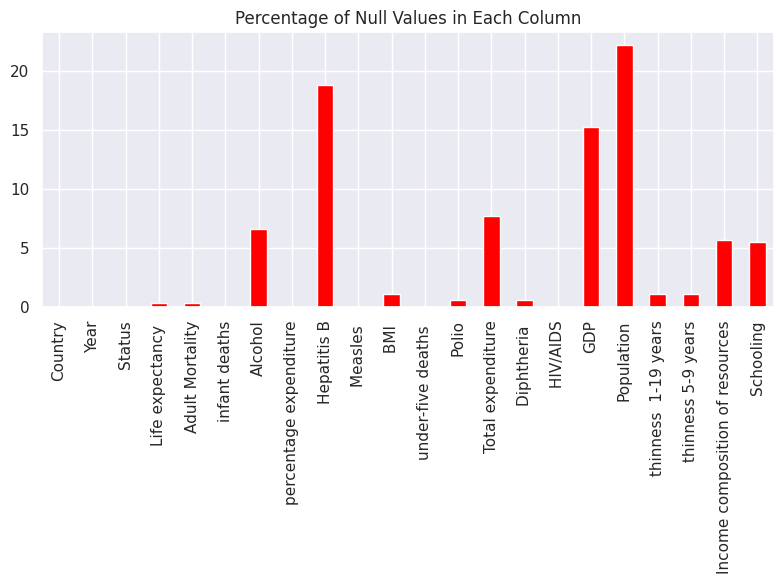

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = data.isnull().mean(axis=0) * 100

plt.figure(figsize=(8, 6))
null_percentages.plot(kind='bar', color='red')
plt.title('Percentage of Null Values in Each Column')
# plt.ylabel('Null Value Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Columns Hepatitis B, GDP and Population have the most number of missing values

Most of the missing values in other columns are randomly that has no pattern

In [ ]:
# Impute missing values with the mean of each column
for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mean())

In [ ]:
data.isna().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
cat_columns = []
num_columns =[]

for col in data.columns:
    if data[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)
print(cat_columns)
print(num_columns)

['Country', 'Status']
['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


**Exploring Outliers**

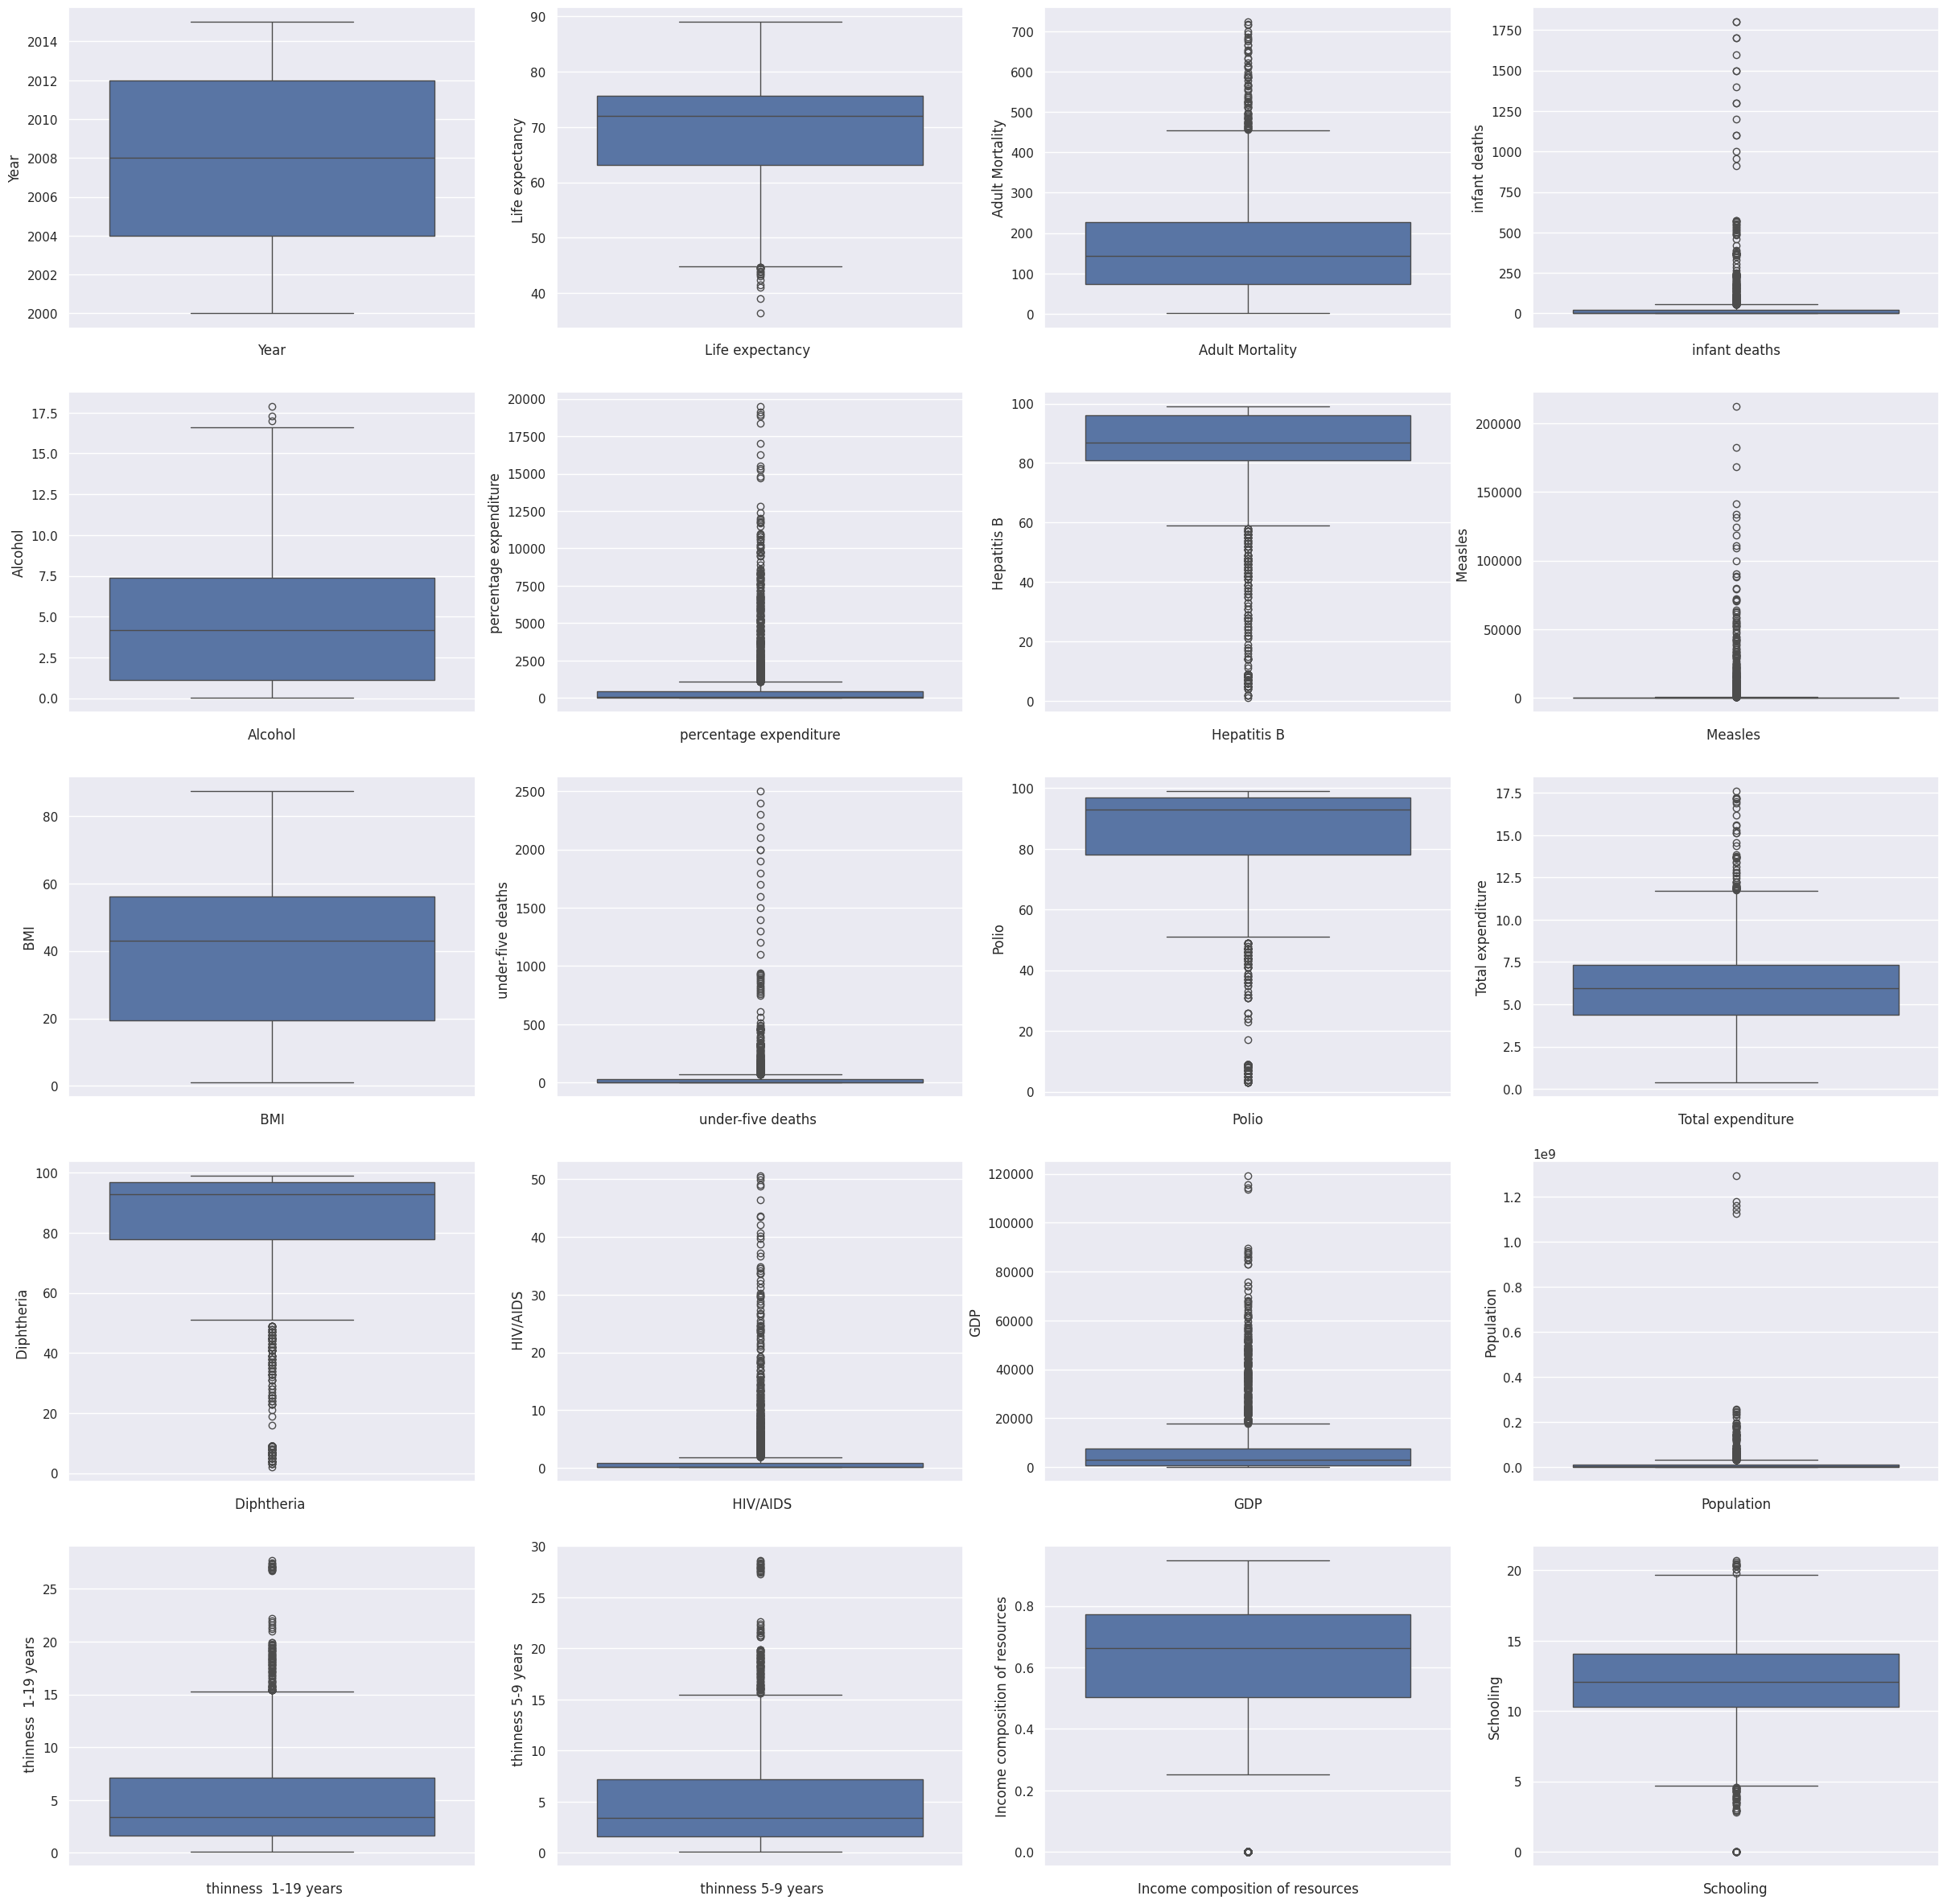

In [ ]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.boxplot(data=data[col])
    plt.xlabel(col)
    counter = counter + 1

In [ ]:
# Function to detect outliers using IQR approach
def detect_outliers(data_column):
    """
    Calculates IQR and identifies outliers.

    Args:
        data_column (pd.Series): The data column to analyze.

    Returns:
        list: A list of outliers.
    """

    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers.tolist()

In [ ]:
# Calculate and store outlier counts and percentages
outlier_data = {}
for col in num_columns:
    outliers = detect_outliers(data[col])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(data[col])) * 100  # Calculate percentage
    outlier_data[col] = {'count': outlier_counts, 'percentage': outlier_percentages}

    print(col)
    print("No. of IQR-based outliers:", outlier_counts)
    print("--------------------------------")

Year
No. of IQR-based outliers: 0
--------------------------------
Life expectancy 
No. of IQR-based outliers: 17
--------------------------------
Adult Mortality
No. of IQR-based outliers: 86
--------------------------------
infant deaths
No. of IQR-based outliers: 315
--------------------------------
Alcohol
No. of IQR-based outliers: 3
--------------------------------
percentage expenditure
No. of IQR-based outliers: 389
--------------------------------
Hepatitis B
No. of IQR-based outliers: 316
--------------------------------
Measles 
No. of IQR-based outliers: 542
--------------------------------
 BMI 
No. of IQR-based outliers: 0
--------------------------------
under-five deaths 
No. of IQR-based outliers: 394
--------------------------------
Polio
No. of IQR-based outliers: 279
--------------------------------
Total expenditure
No. of IQR-based outliers: 51
--------------------------------
Diphtheria 
No. of IQR-based outliers: 298
--------------------------------
 HIV/AIDS
No

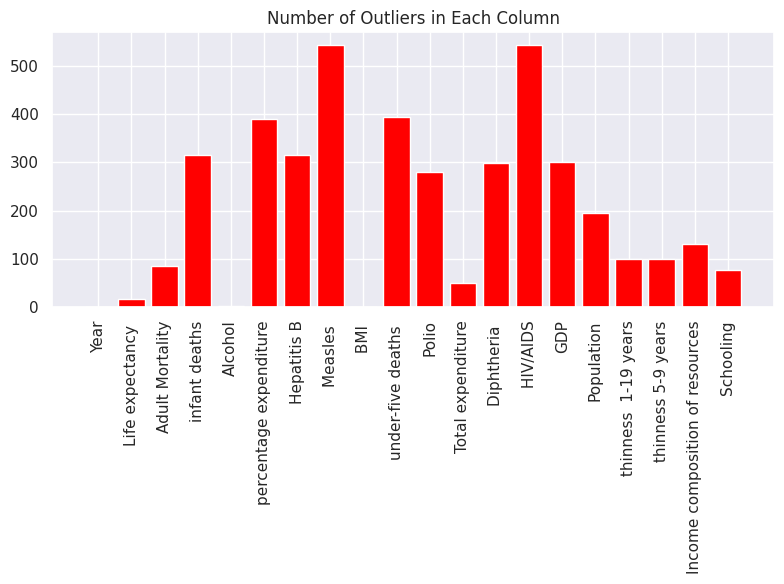

In [ ]:
# Plot outlier counts
plt.figure(figsize=(8, 6))
plt.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
plt.title('Number of Outliers in Each Column')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

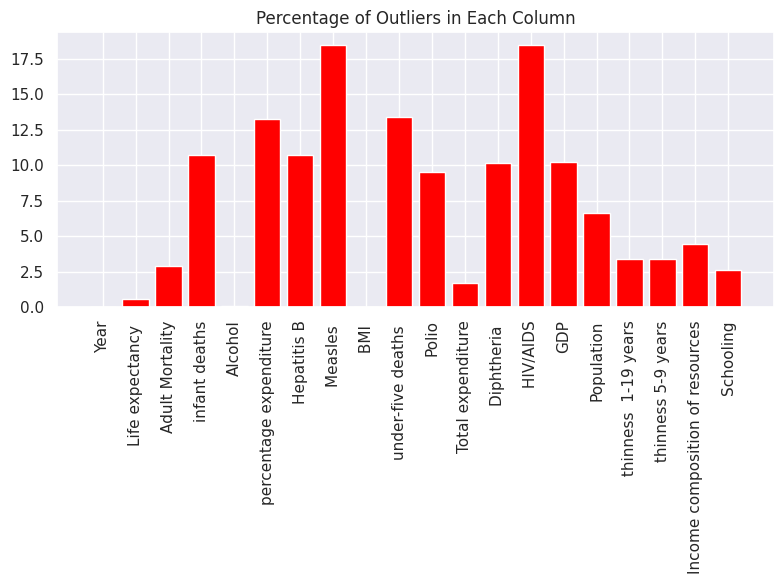

In [ ]:
# Plot outlier percentages
plt.figure(figsize=(8, 6))
plt.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='red')
plt.title('Percentage of Outliers in Each Column')
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Replace outliers with column means (handle missing values appropriately)
for col in num_columns:
    outliers = detect_outliers(data[col])
    if outliers:  # Check if there are outliers before replacing
        mean_value = data[col].mean()  # Calculate mean (consider handling missing values)
        data.loc[data[col].isin(outliers), col] = mean_value  # Replace outliers with mean

**Data Visualization**


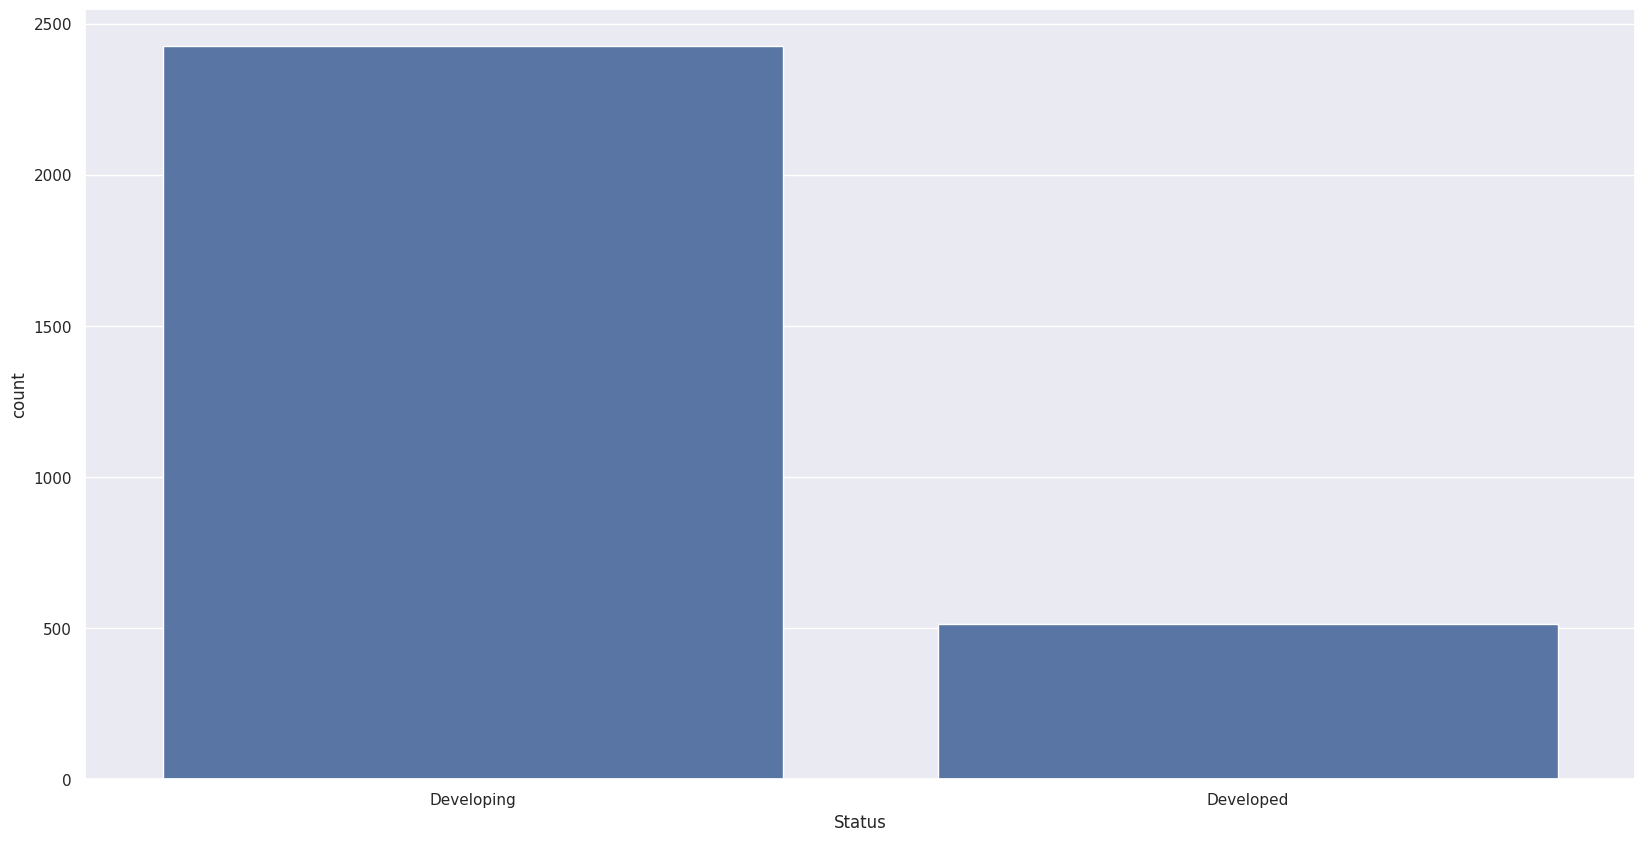

In [ ]:
g = sns.countplot(x="Status",data=data)
plt.xticks()
plt.show()


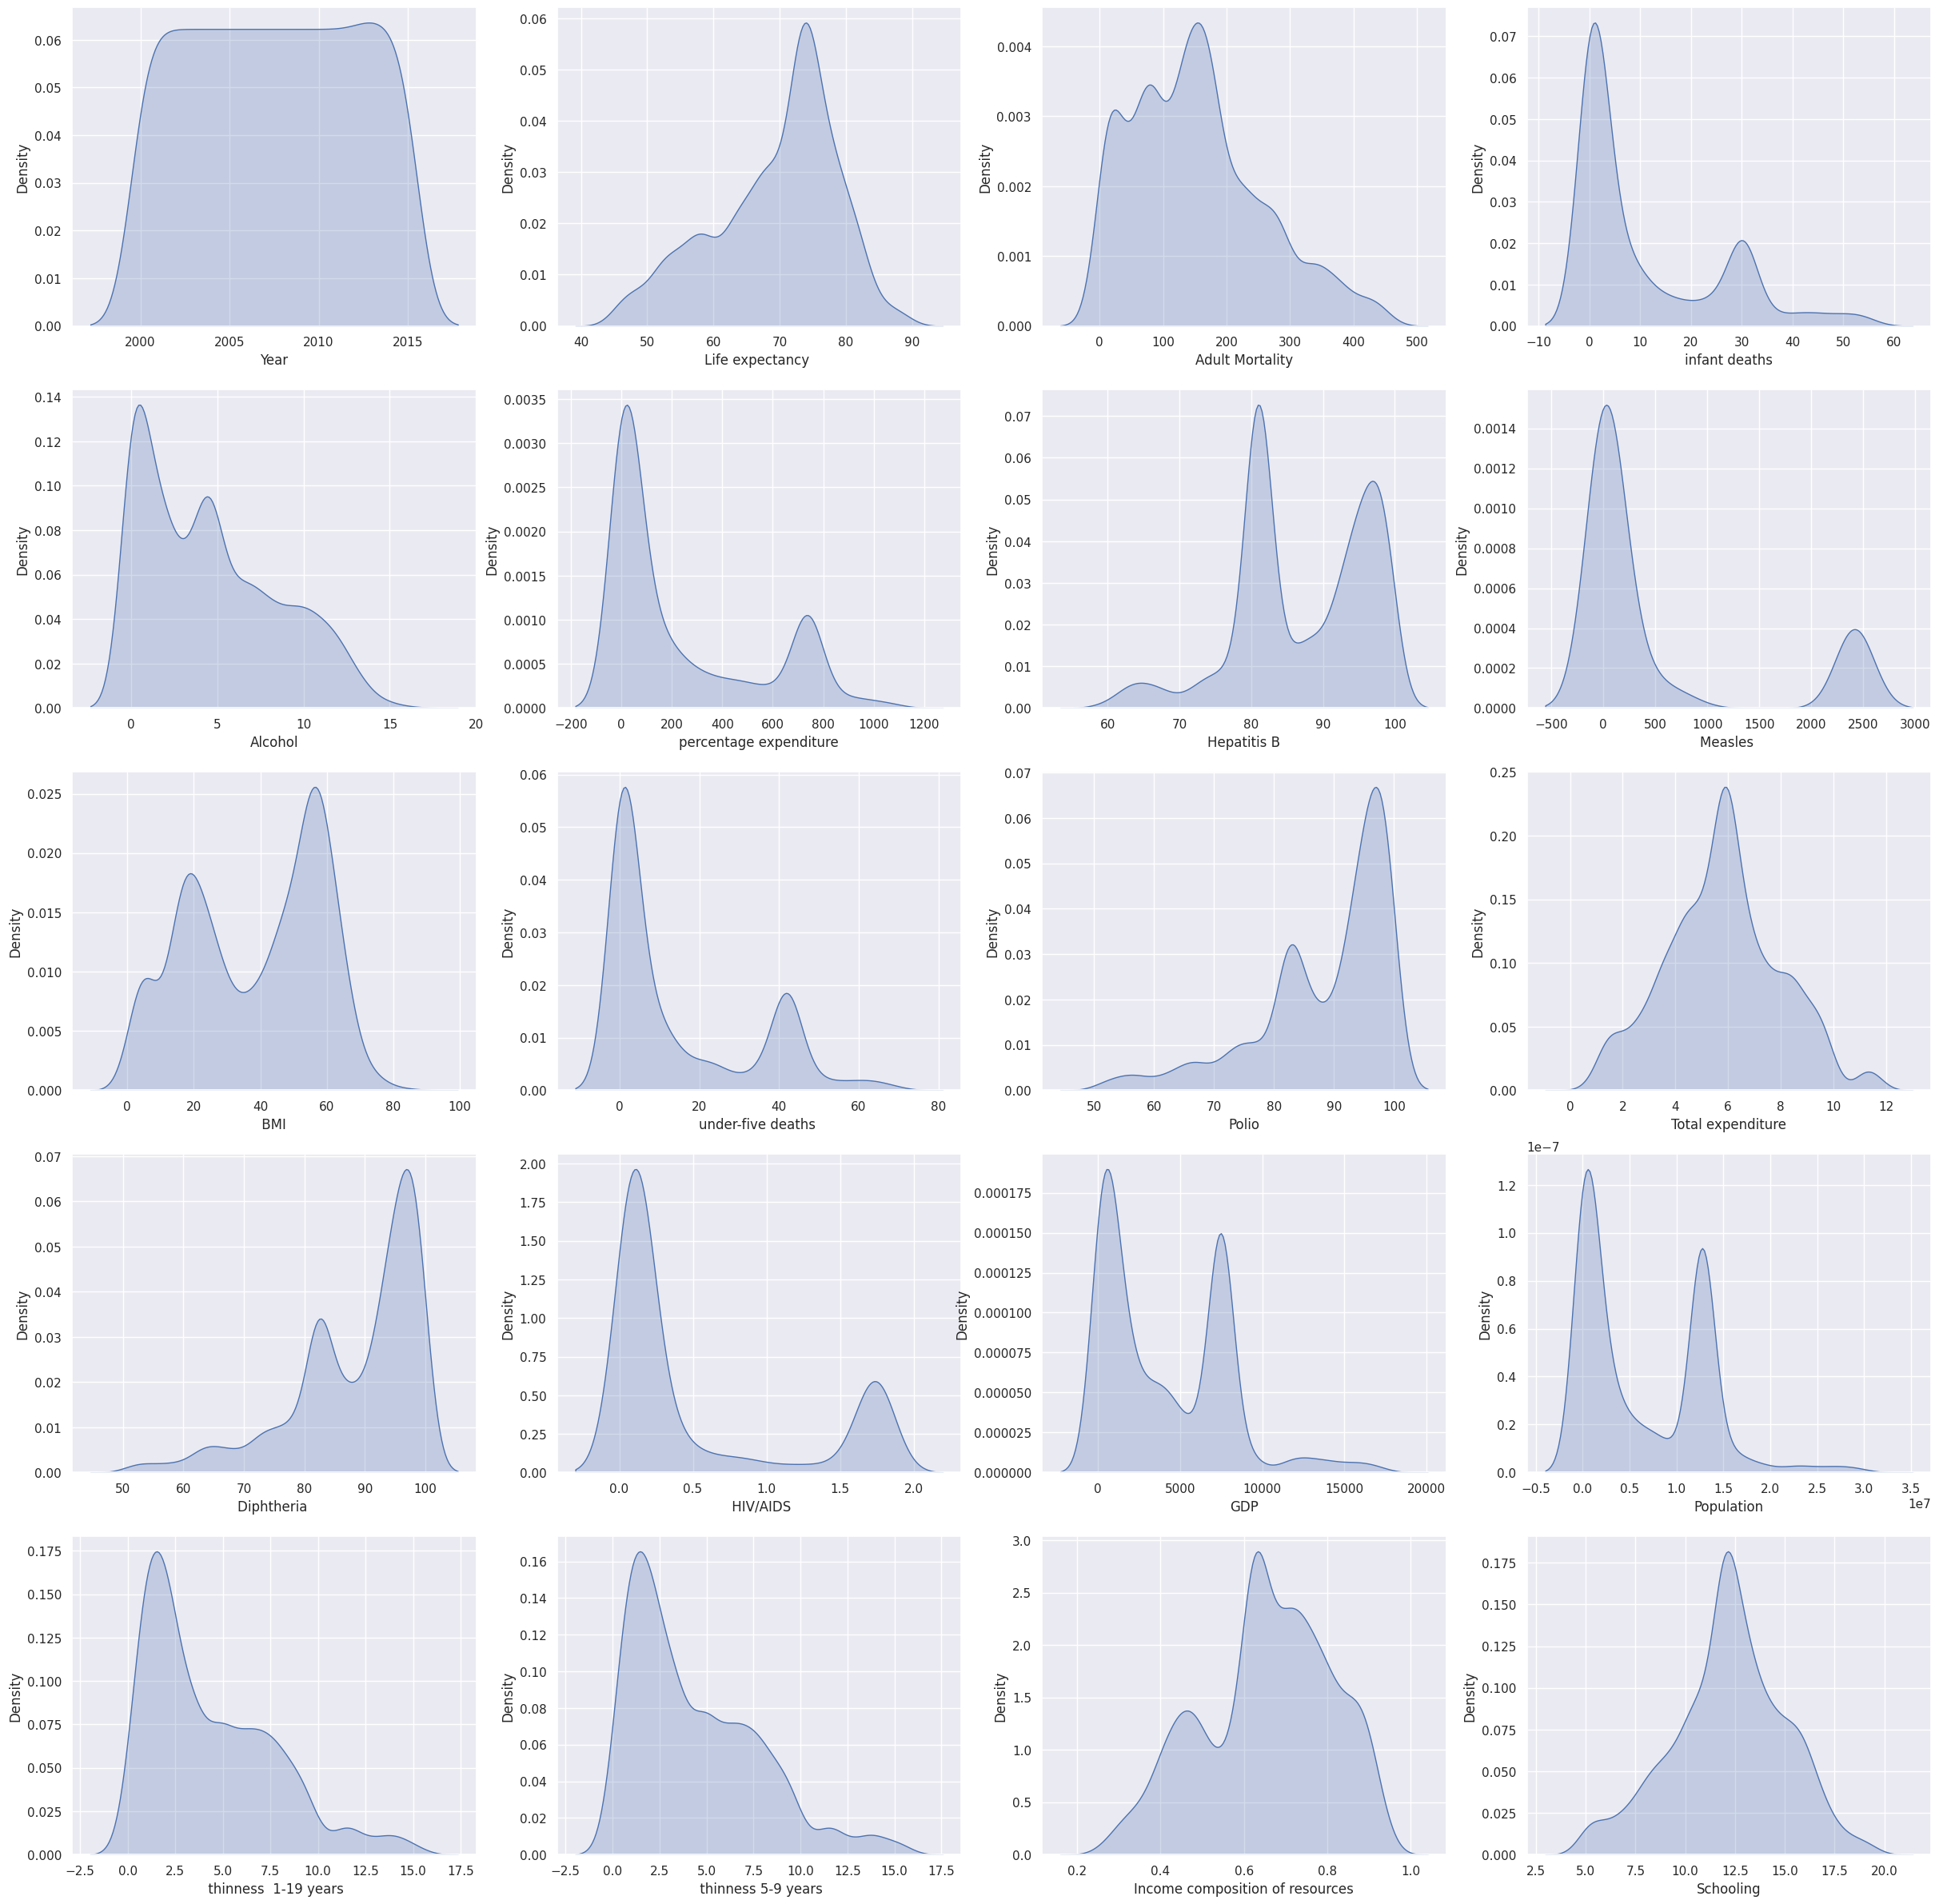

In [ ]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col,data=data,fill=True)
    plt.xticks()
    counter = counter + 1


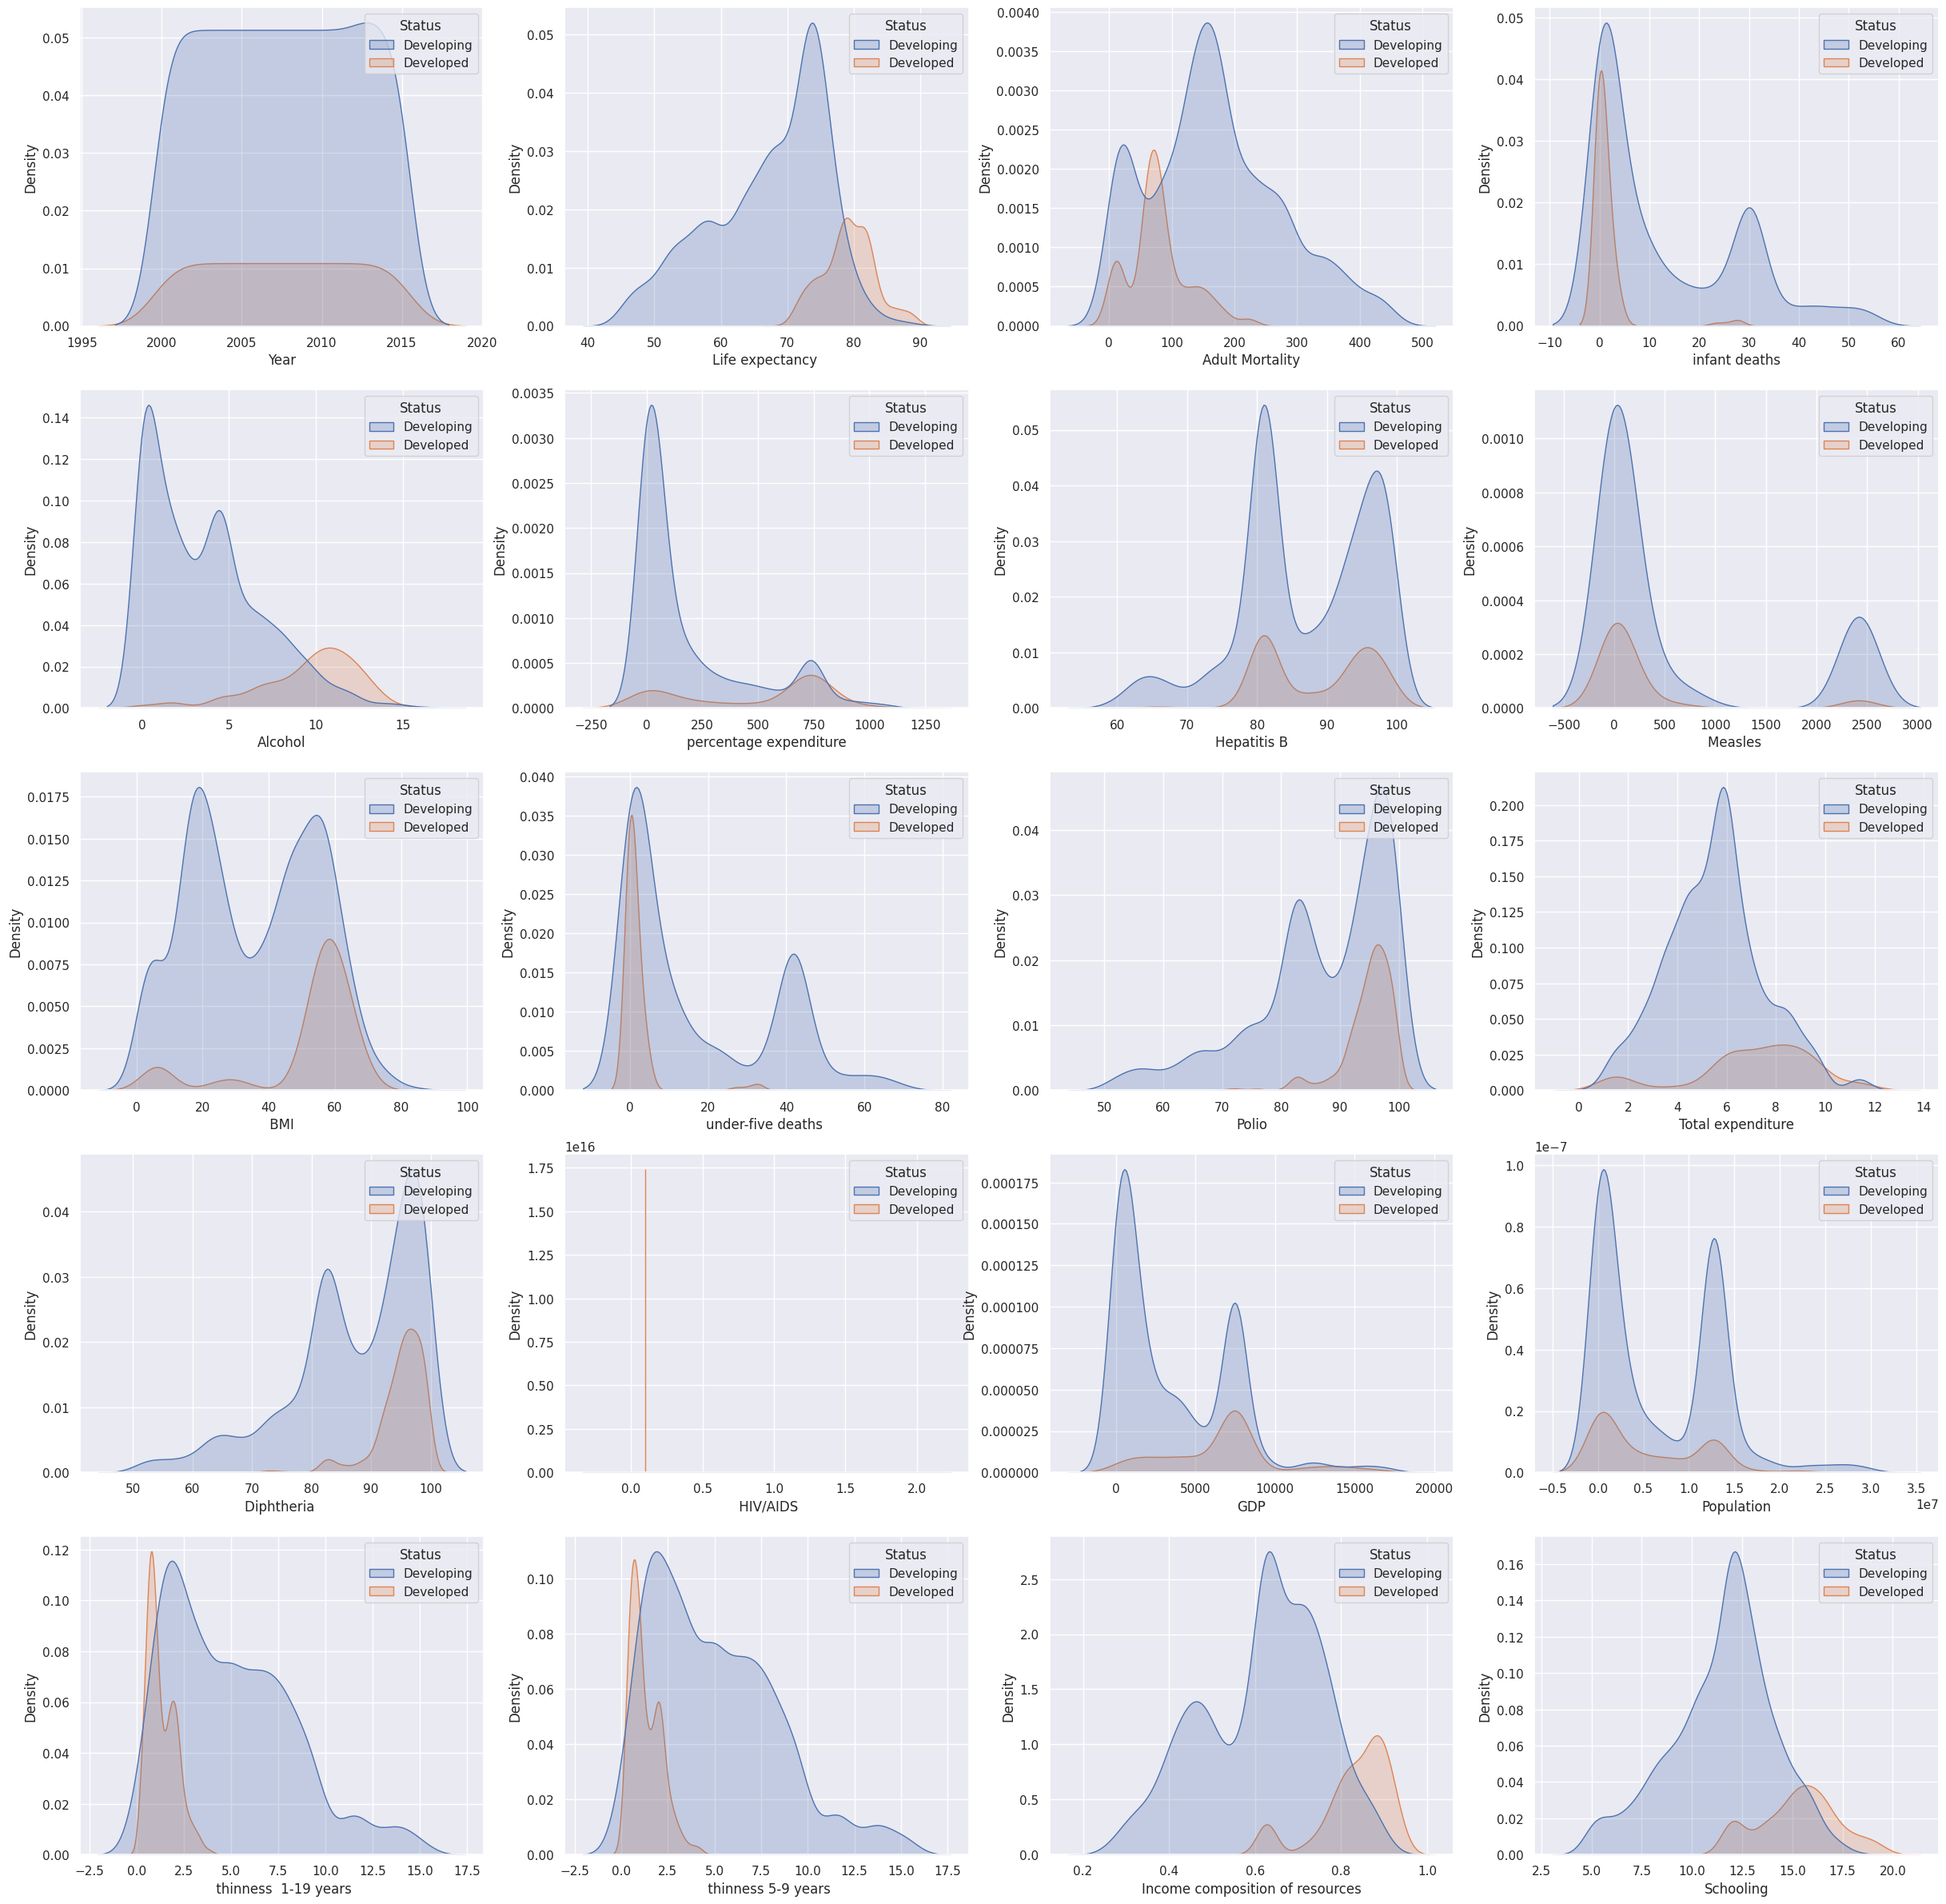

In [ ]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col,data=data,fill=True,hue="Status")
    plt.xticks()
    counter = counter + 1

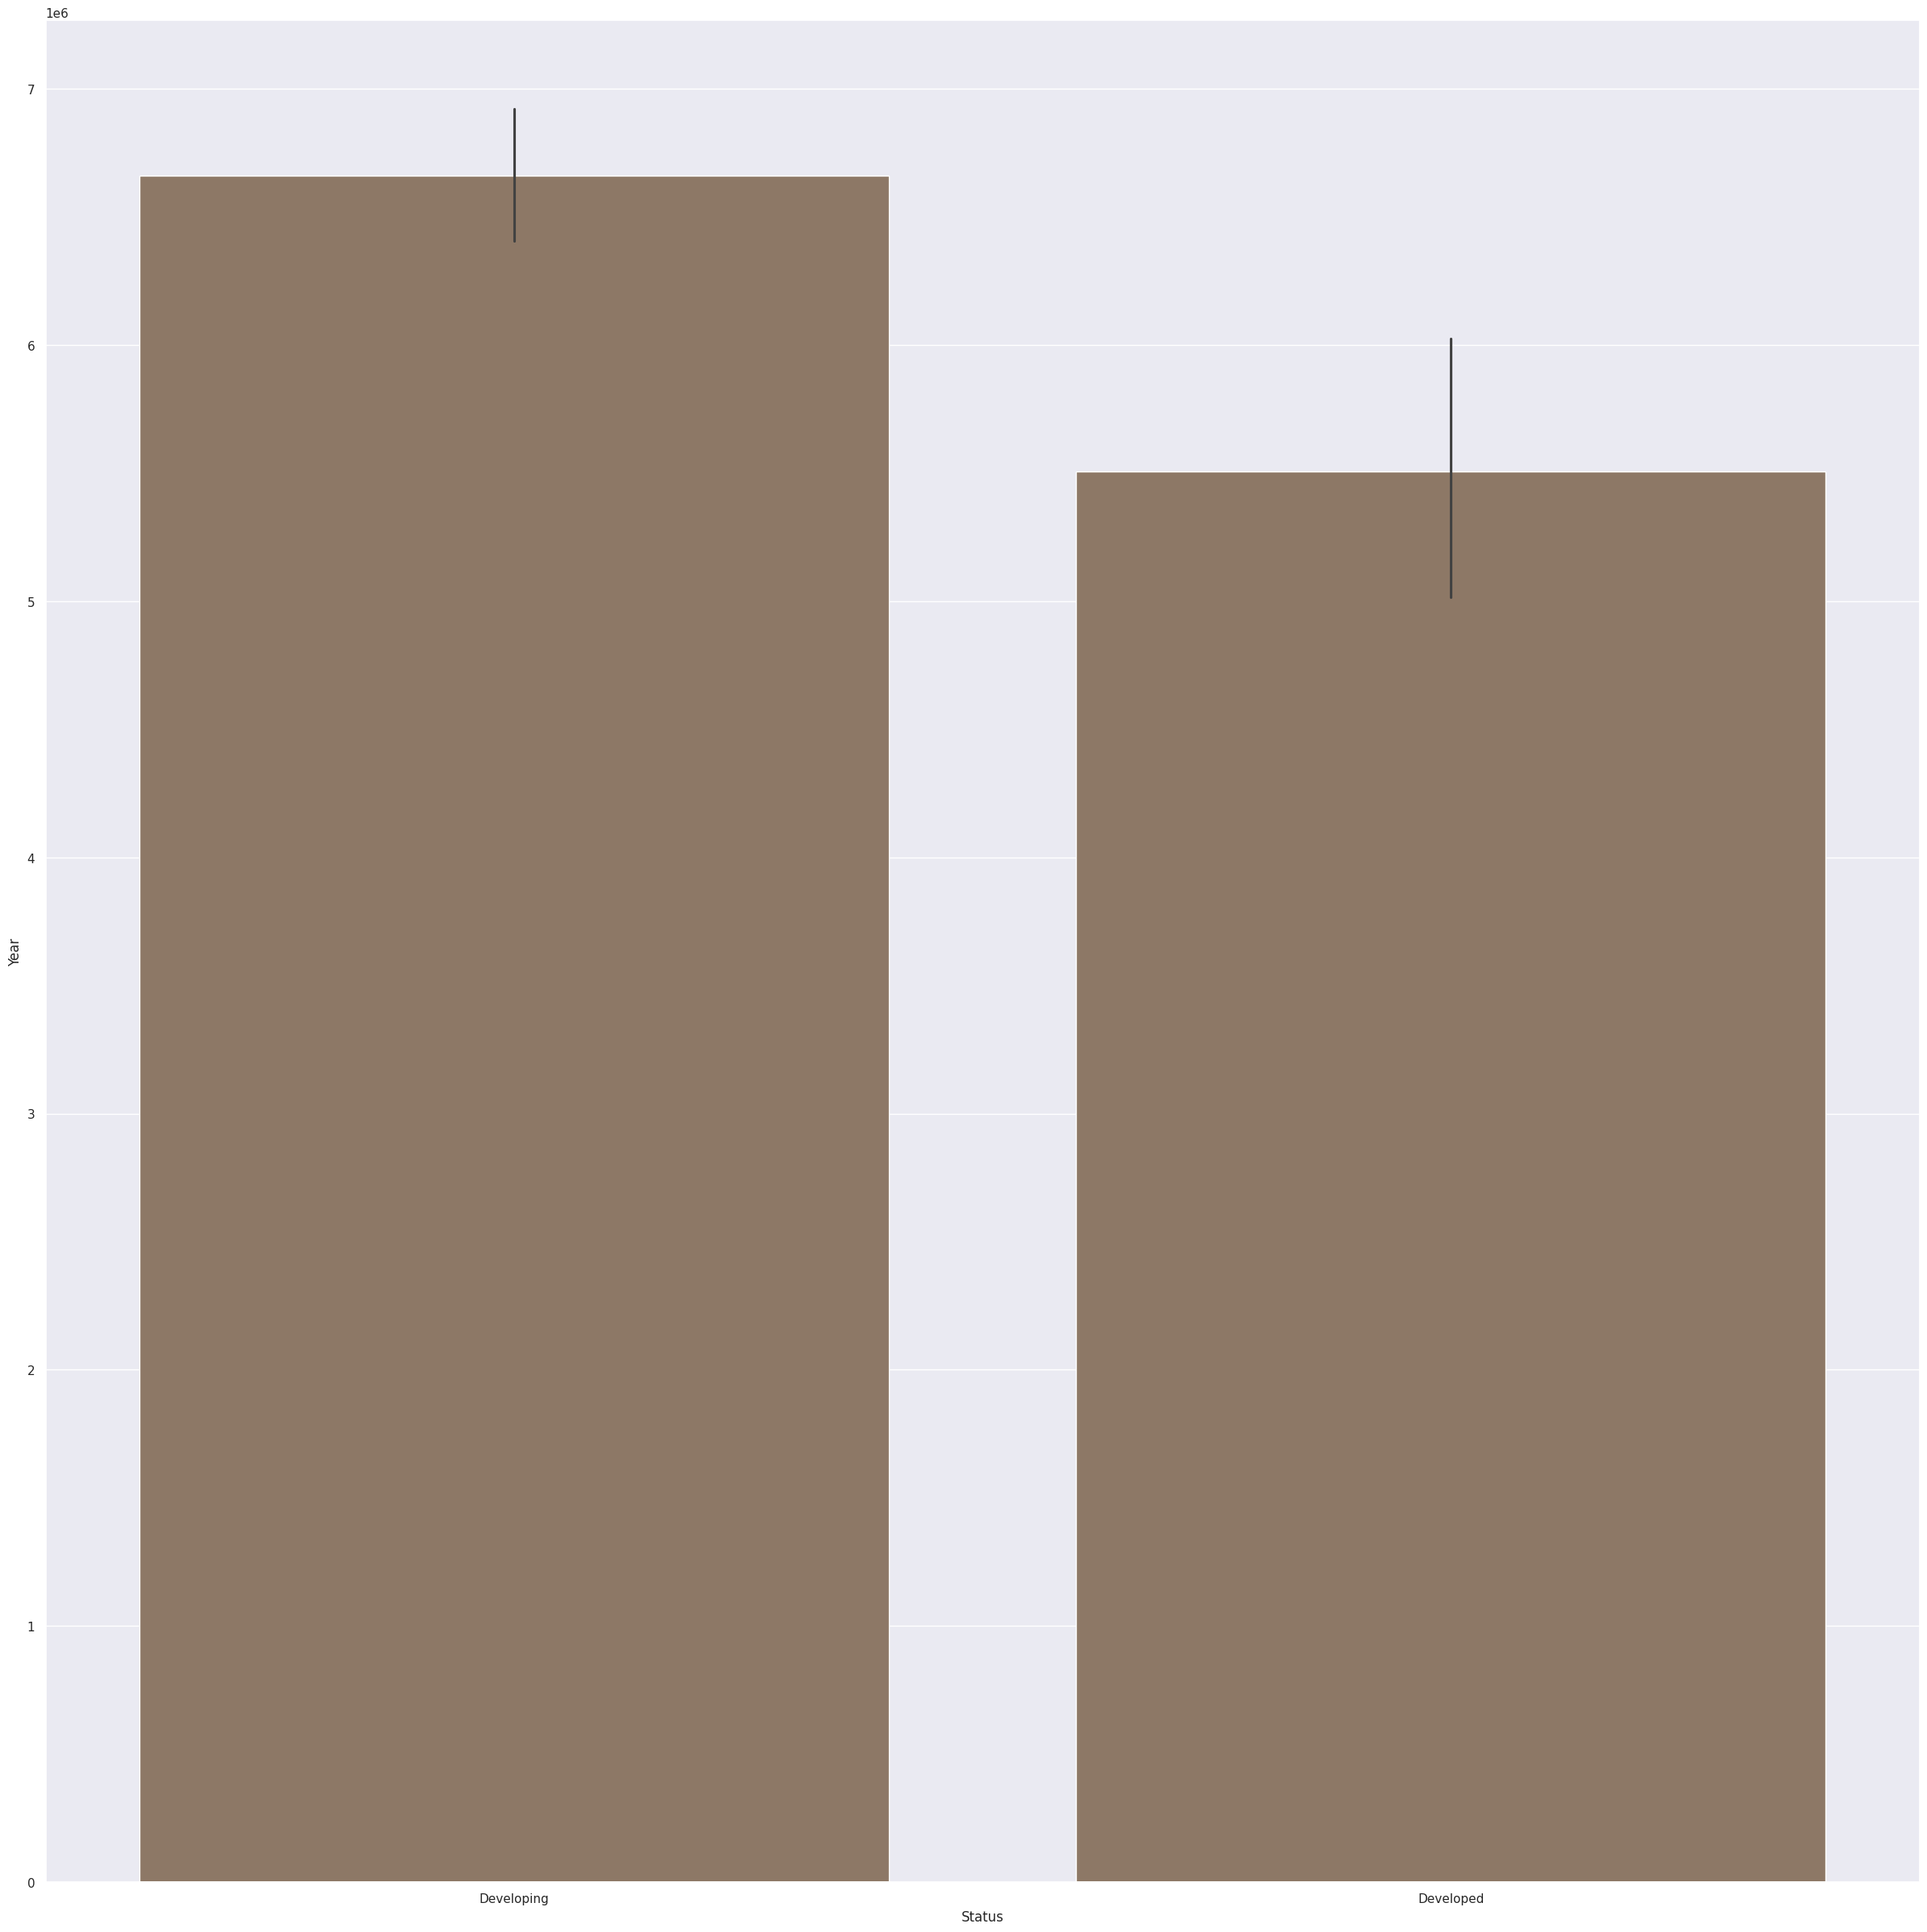

In [ ]:
ig = plt.figure(figsize=(30,30))

counter = 0

for i in data.columns:
    if (data[i].dtype != 'object'):
        sub = fig.add_subplot(5,4,counter+1)
        g = sns.barplot(y=i,data=data,x='Status')
        plt.xticks()
        counter = counter + 1

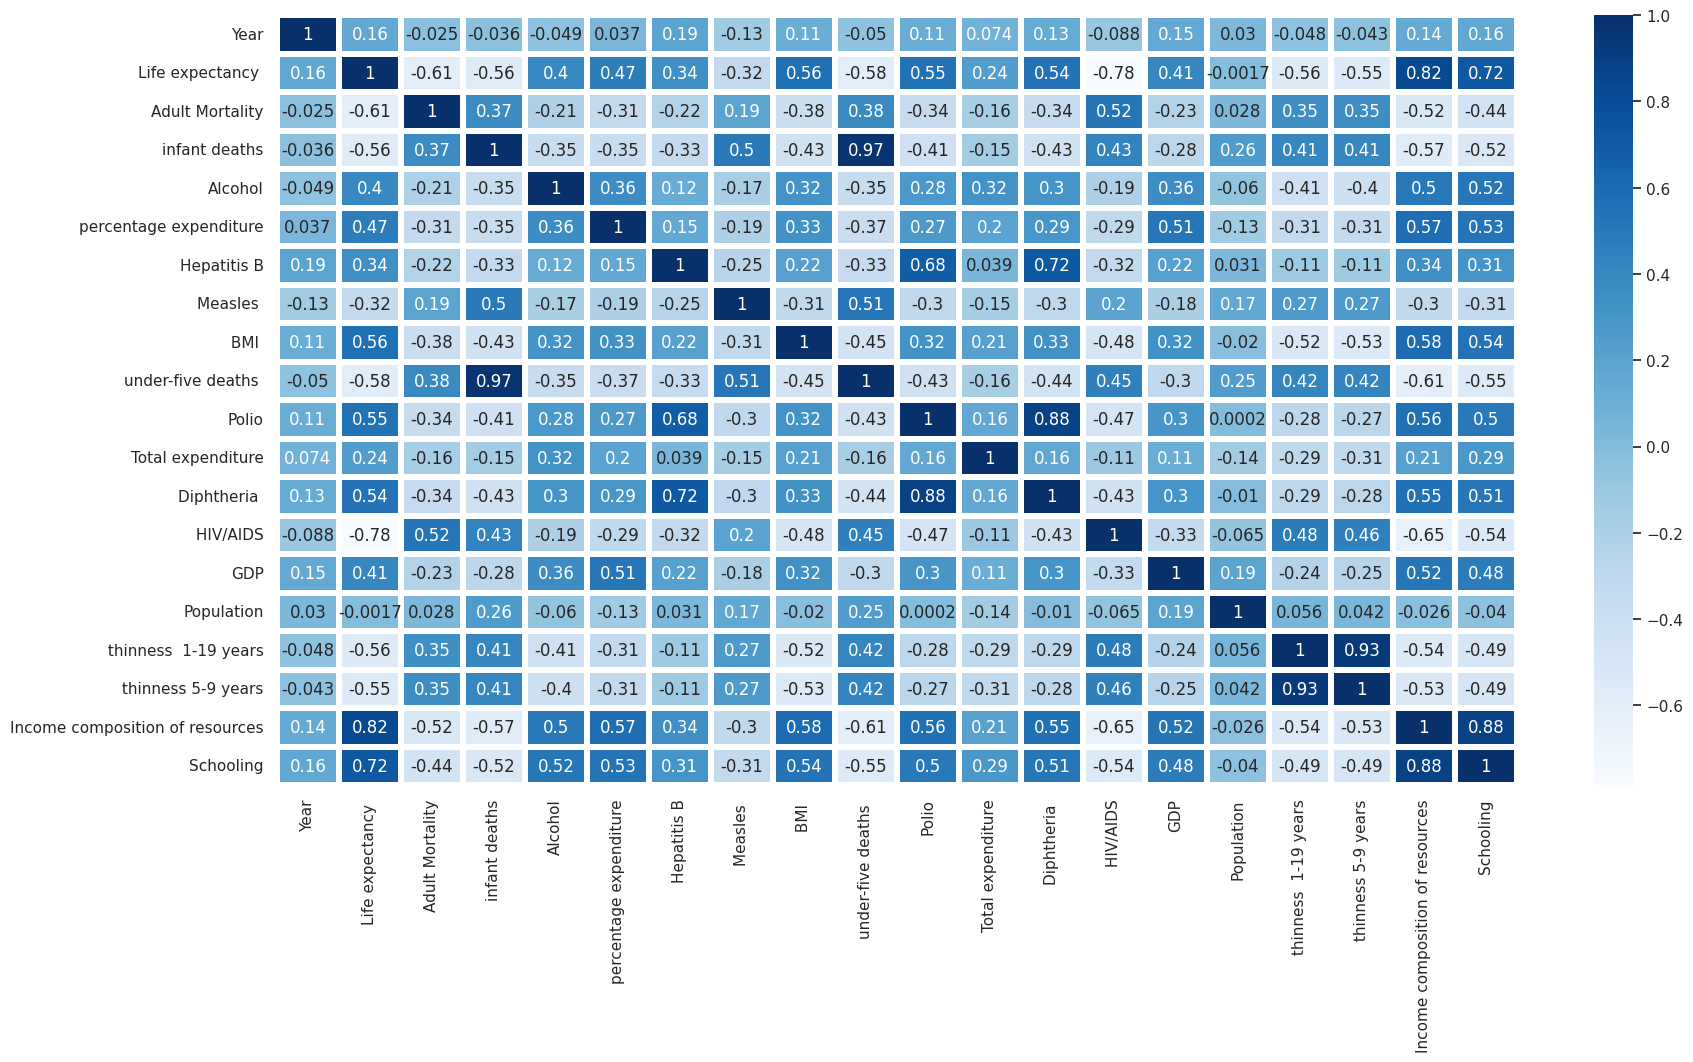

In [ ]:
plt.figure(figsize = (20,10))

sns.heatmap(data[num_columns].corr(), cmap='Blues' ,linewidths= 3,annot = True)
plt.show()


Here, we can see that the column "under-5 Deaths" and "Infant Death" has the correlation=1, so we remove one of them. This way we deal with Multicollinearity


There is a high correlation between thinness 1-19 years and thinnes 5-9 years

There is a high correlation between under-five deaths and infant deaths

There is a high correlation between Income composition of resources and Schooling

There is a high correlation between Diphtheria and Polio





In [ ]:
data.drop("under-five deaths ", axis=1, inplace=True)
data.shape

(2938, 21)

In [ ]:
data.drop(['percentage expenditure',' thinness  1-19 years','Income composition of resources'],inplace=True,axis=1)

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness 5-9 years', 'Schooling'],
      dtype='object')

** Tests**

In [ ]:
#1
# Filter data for Developed and Developing countries
developed = data[data['Status'] == 0]
developing = data[data['Status'] == 1]

# Perform an independent two-sample t-test
t_statistic, p_value = ttest_ind(developed['Hepatitis B'].dropna(), developing['Hepatitis B'].dropna(), equal_var=False)
alpha = 0.05

print("Null Hypothesis (H0): There is no significant difference in Hepatitis B vaccination rates between Developed and Developing countries.")
print("Alternative Hypothesis (H1): There is a significant difference in Hepatitis B vaccination rates between Developed and Developing countries.")
print("\nResults:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in Hepatitis B vaccination rates between Developed and Developing countries.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in Hepatitis B vaccination rates between Developed and Developing countries.")


Null Hypothesis (H0): There is no significant difference in Hepatitis B vaccination rates between Developed and Developing countries.
Alternative Hypothesis (H1): There is a significant difference in Hepatitis B vaccination rates between Developed and Developing countries.

Results:
T-statistic: nan
P-value: nan

Conclusion: Fail to reject the null hypothesis.
There is no significant difference in Hepatitis B vaccination rates between Developed and Developing countries.


In [ ]:
#2
# Filter data for Developed and Developing countries
developed = data[data['Status'] == 0]
developing = data[data['Status'] == 1]

# Perform an independent two-sample t-test
t_statistic, p_value = ttest_ind(developed['Life expectancy '].dropna(), developing['Life expectancy '].dropna(), equal_var=False)
alpha = 0.05

print("Null Hypothesis (H0): There is no significant difference in life expectancy between Developed and Developing countries.")
print("Alternative Hypothesis (H1): There is a significant difference in life expectancy between Developed and Developing countries.")
print("\nResults:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in life expectancy between Developed and Developing countries.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in life expectancy between Developed and Developing countries.")

Null Hypothesis (H0): There is no significant difference in life expectancy between Developed and Developing countries.
Alternative Hypothesis (H1): There is a significant difference in life expectancy between Developed and Developing countries.

Results:
T-statistic: nan
P-value: nan

Conclusion: Fail to reject the null hypothesis.
There is no significant difference in life expectancy between Developed and Developing countries.


In [ ]:
#3
# Group data by 'Year'
grouped_data = data.groupby('Year')['Life expectancy '].mean()

# Perform an independent two-sample t-test for adjacent years
t_statistic, p_value = ttest_ind(grouped_data[:-1], grouped_data[1:], equal_var=False)
alpha = 0.05

print("Null Hypothesis (H0): There is no significant difference in life expectancy across adjacent years.")
print("Alternative Hypothesis (H1): There is a significant difference in life expectancy across adjacent years.")
print("\nResults:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in life expectancy across adjacent years.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in life expectancy across adjacent years.")


Null Hypothesis (H0): There is no significant difference in life expectancy across adjacent years.
Alternative Hypothesis (H1): There is a significant difference in life expectancy across adjacent years.

Results:
T-statistic: -0.5545186211606197
P-value: 0.5836266734374211

Conclusion: Fail to reject the null hypothesis.
There is no significant difference in life expectancy across adjacent years.


Correlation between Alcohol Consumption and Life Expectancy

In [ ]:
#4.1
from scipy.stats import pearsonr
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(data['Alcohol'].dropna(), data['Life expectancy '].dropna())

alpha = 0.05

print("Null Hypothesis (H0): There is no significant correlation between alcohol consumption and life expectancy.")
print("Alternative Hypothesis (H1): There is a significant correlation between alcohol consumption and life expectancy.")
print("\nResults:")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant correlation between alcohol consumption and life expectancy.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant correlation between alcohol consumption and life expectancy.")

Null Hypothesis (H0): There is no significant correlation between alcohol consumption and life expectancy.
Alternative Hypothesis (H1): There is a significant correlation between alcohol consumption and life expectancy.

Results:
Correlation coefficient: 0.39599071148943965
P-value: 6.747315469977561e-111

Conclusion: Reject the null hypothesis.
There is a significant correlation between alcohol consumption and life expectancy.


Comparison of BMI between Developed and Developing Countries

In [ ]:
#4.2
# Filter data for Developed and Developing countries
developed = data[data['Status'] == 0]
developing = data[data['Status'] == 1]

# Perform an independent two-sample t-test
t_statistic, p_value = ttest_ind(developed[' BMI '].dropna(), developing[' BMI '].dropna(), equal_var=False)
alpha = 0.05

print("Null Hypothesis (H0): There is no significant difference in BMI between Developed and Developing countries.")
print("Alternative Hypothesis (H1): There is a significant difference in BMI between Developed and Developing countries.")
print("\nResults:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a significant difference in BMI between Developed and Developing countries.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in BMI between Developed and Developing countries.")

Null Hypothesis (H0): There is no significant difference in BMI between Developed and Developing countries.
Alternative Hypothesis (H1): There is a significant difference in BMI between Developed and Developing countries.

Results:
T-statistic: nan
P-value: nan

Conclusion: Fail to reject the null hypothesis.
There is no significant difference in BMI between Developed and Developing countries.


In [ ]:
columns_of_interest = [
    'Adult Mortality', 'Alcohol', 'Hepatitis B',
    ' BMI ', 'Polio', 'Total expenditure', ' HIV/AIDS', 'GDP',
      'Schooling'
]

# Select relevant columns
selected_data = data[columns_of_interest + ['Life expectancy ']]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Adult Mortality   Alcohol  Hepatitis B      BMI      Polio  \
Adult Mortality           1.000000 -0.210288    -0.224836 -0.379493 -0.343494   
Alcohol                  -0.210288  1.000000     0.121820  0.316572  0.278632   
Hepatitis B              -0.224836  0.121820     1.000000  0.217969  0.682853   
 BMI                     -0.379493  0.316572     0.217969  1.000000  0.322333   
Polio                    -0.343494  0.278632     0.682853  0.322333  1.000000   
Total expenditure        -0.163742  0.321324     0.039036  0.212977  0.157526   
 HIV/AIDS                 0.520542 -0.193246    -0.316357 -0.481815 -0.465610   
GDP                      -0.226169  0.358755     0.222948  0.323724  0.299581   
Schooling                -0.444540  0.518458     0.308541  0.536329  0.503487   
Life expectancy          -0.607129  0.395991     0.341601  0.558196  0.545176   

                   Total expenditure   HIV/AIDS       GDP  Schooling  \
Adult Mortality 

**Model**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
data['Country'] = lencoder.fit_transform(data['Country'])
data['Status'] = lencoder.fit_transform(data['Status'])

In [ ]:
X = data.drop(['Life expectancy '], axis=1)
y = data['Life expectancy ']
df_sorted = data.sort_values(by='Country')

unique_countries = df_sorted['Country'].unique()

train_countries, test_countries = train_test_split(unique_countries, test_size=0.2, random_state=42)

train_df = df_sorted[df_sorted['Country'].isin(train_countries)]
test_df = df_sorted[df_sorted['Country'].isin(test_countries)]

X_train = train_df.drop(['Life expectancy '], axis=1)
y_train = train_df['Life expectancy ']
X_test = test_df.drop(['Life expectancy '], axis=1)
y_test = test_df['Life expectancy ']

# Train two linear regression models: one including the 'Country' column and another with this column removed
model_with_country = LinearRegression()
model_with_country.fit(X_train, y_train)

model_without_country = LinearRegression()
model_without_country.fit(X_train.drop(['Country'], axis=1), y_train)
y_pred_with_country = model_with_country.predict(X_test)
y_pred_without_country = model_without_country.predict(X_test.drop(['Country'], axis=1))
mse_with_country = mean_squared_error(y_test, y_pred_with_country)
mse_without_country = mean_squared_error(y_test, y_pred_without_country)
print("Mean Squared Error (with 'Country' column):", mse_with_country)
print("Mean Squared Error (without 'Country' column):", mse_without_country)

Mean Squared Error (with 'Country' column): 18.936179915120288
Mean Squared Error (without 'Country' column): 18.851056702126908


Model with ‘Country’ Column:

The mean squared error (MSE) on the test split was approximately 18.94.

Model without ‘Country’ Column:

The MSE on the test split was approximately 18.85.



Effect on Model Performance:

The inclusion of the “Country” column did not significantly impact the model’s performance.

The difference in MSE between the two models is minimal.

Correct Approach:

The correct approach is to exclude the “Country” column during model training and evaluation.

Including the “Country” column could introduce bias, as the model might learn country-specific effects rather than general patterns.

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
X = data.drop(['Life expectancy '], axis=1)
y = data['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train two linear regression models: one including the 'Country' column and another with this column removed
model_with_country = LinearRegression()
model_with_country.fit(X_train, y_train)

model_without_country = LinearRegression()
model_without_country.fit(X_train.drop(['Country'], axis=1), y_train)
y_pred_with_country = model_with_country.predict(X_test)
y_pred_without_country = model_without_country.predict(X_test.drop(['Country'], axis=1))
mse_with_country = mean_squared_error(y_test, y_pred_with_country)
mse_without_country = mean_squared_error(y_test, y_pred_without_country)
print("Mean Squared Error (with 'Country' column):", mse_with_country)
print("Mean Squared Error (without 'Country' column):", mse_without_country)

Mean Squared Error (with 'Country' column): 14.701670993570891
Mean Squared Error (without 'Country' column): 14.69859729576165


 the dataset was randomly split, we observe that both models—one with the ‘Country’ column and one without it—yielded very similar results. The mean squared error (MSE) for both models is around 14.70, which is lower than the previous experiment’s MSE.


Comparing to the previous part:

The inclusion of the “Country” column had a minimal impact on model performance.

Random splitting reduced the difference in MSE between the two models.

Correct Approach:

Given the negligible difference in performance, the model without the ‘Country’ column remains the preferred approach.

Excluding the “Country” column ensures a more robust and unbiased prediction.

In [ ]:
from sklearn.linear_model import Lasso
X = data.drop(['Life expectancy '], axis=1)
y = data['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
coefficients_simple = model_simple.coef_
coefficients_lasso = model_lasso.coef_
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Simple Linear Regression': coefficients_simple, 'Lasso Regression': coefficients_lasso})
print(coefficients_df)

                Feature  Simple Linear Regression  Lasso Regression
0               Country             -1.127707e-03     -4.556144e-04
1                  Year              1.387678e-01      1.334367e-01
2                Status             -2.612657e+00     -1.502510e+00
3       Adult Mortality             -1.300754e-02     -1.435809e-02
4         infant deaths             -6.816671e-02     -7.023040e-02
5               Alcohol              1.809911e-02      4.947371e-02
6           Hepatitis B             -6.185490e-02     -6.441965e-02
7              Measles              -2.366841e-04     -2.019168e-04
8                  BMI               1.427849e-02      1.668305e-02
9                 Polio              2.232667e-02      2.798428e-02
10    Total expenditure              7.952636e-02      6.473254e-02
11          Diphtheria               8.699613e-02      8.757122e-02
12             HIV/AIDS             -6.289737e+00     -5.871281e+00
13                  GDP              2.352373e-0

Feature Weights:

The feature weights represent the coefficients assigned to each feature by the respective models.

Positive weights indicate a positive relationship with the target variable, while negative weights indicate a negative relationship.

Interpretation:

Country:

In both models, the weight for “Country” is close to zero. This suggests that the “Country” feature has minimal impact on the target variable (life expectancy).

This aligns with our earlier observation that the correlation between “Country” and life expectancy was weak.

Year:

Both models assign a positive weight to the “Year” feature. This implies that as the year increases, life expectancy tends to improve.

The positive correlation we calculated earlier supports this finding.

Status:

The “Status” feature (likely indicating whether a country is developed or developing) has a negative weight in both models.

This aligns with the negative correlation observed previously—developed countries tend to have higher life expectancy.

Other Features:

Features related to health factors have negative weights, indicating their impact on life expectancy.

Factors like “Alcohol,” “Polio,” and “Schooling” have positive weights, suggesting a positive relationship with life expectancy.

Lasso Regularization:

Lasso regression introduces L1 regularization, which encourages sparsity by shrinking some feature weights to exactly zero.

In the Lasso model, we observe smaller weights for most features compared to simple linear regression.

This regularization helps prevent overfitting and selects relevant features.

Correct Approach:

Given the similarity in MSE between the two models, the Lasso Regression approach is preferred.

It provides a more parsimonious model by automatically selecting important features and shrinking irrelevant ones.